Data analysis for the pilot participants in PLEARN

# Load Libraries and Resources

In [1]:
library('readr')
library('blabr')
library('plyr')
library('dplyr')
library('ggplot2')
library('rjson')
library('parallel')
library("readxl")
source('PLEARN_analysis_helper.R')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
item_properties = read.csv('../PLEARN_experiments/csv/plearn_receptiveTask_datasource.csv')
item_properties[1,]

s_form novel_id background_context vowel_carrier
1 book   !        house               in the house
  full_carrier                   s_carrier         s_punct s_wav_index
1 Can you find the  in the house Can you find the  ?       65         
  s_sentence                                      pl_form ⋯ TargetSide
1 65. book... Can you find the book in the house? books   ⋯ NA        
  trial_index NovelColor order expt_index TargetLoc DistractorLoc AudioTarget
1 NA          NA         1     1          (640,512) (0,0)         65.wav     
  TargetImage              DistractorImage       
1 1_book_singular_left.png 1_book_plural_left.png

In [5]:
# audio timings for the original version ("bg_")
bg_audio_timings = getAudioTimingsFromGlob("../PLEARN_experiments/stimuli/raw_audio2/*.cut")
bg_audio_timings_with_metadata = merge(item_properties, bg_audio_timings, by.x='AudioTarget', 
    by.y='audiotarget')
bg_audio_timings_with_metadata$plural_duration = (bg_audio_timings_with_metadata$target_noun_end_time -
    bg_audio_timings_with_metadata$begin_disambig_region) * 1000 
print(nrow(bg_audio_timings_with_metadata))

[1] 63


In [19]:
# audio timings for the red/blue version ("rb_")
rb_audio_timings = getAudioTimingsFromGlob("../PLEARN_experiments/stimuli/raw_audio_simplified/*.cut")
rb_audio_timings_with_metadata = merge(item_properties, rb_audio_timings, by.x='AudioTarget', 
    by.y='audiotarget')
# we don't have duration information until Chompsky is up again 
rb_audio_timings_with_metadata$plural_duration = (rb_audio_timings_with_metadata$target_noun_end_time -
    rb_audio_timings_with_metadata$begin_disambig_region) * 1000 
print(nrow(rb_audio_timings_with_metadata))

[1] 63


In [20]:
subject_info = read.csv('subject_info.csv', stringsAsFactors=F) #No PII
subject_info$participant_name = sapply(strsplit(subject_info$filename,'_' ), function(x){x[1]})
subject_info$age_in_months = subject_info$age_in_days / 30.5
subject_info

id        include filename                  age_in_days gender type 
1  plsm      1       smflip3_fixreport.txt       NA        M      adult
2  pl00      1       pl00_fixations.txt         769        F      child
3  pl01      1       pl01_fixations.txt         788        F      child
4  pl03      1       pl03_fixations.txt         810        F      child
5  pl04      1                                  858        F      child
6  pl05      1                                  862        F      child
7  pl06      1       pl06_fixations.txt          NA               adult
8  pl07      1       pl07_fixations.txt          NA               adult
9  pl08      1       pl08_fixations.txt          NA               adult
10 pl09      1       pl09_fixations.txt         796        F      child
11 pl10      1       pl10_fixations.txt         897        M      child
12 adultpl12 1       adultpl12_fixations.txt     NA               adult
13 adultpl13 1       adultpl13_fixations.txt     NA               adult
14 adultpl14 1       adultpl14_fixations.txt     NA               adult
15 adultpl15 1       adultpl15_fixations.txt     NA               adult
16 adultpl16 1       adultpl16_fixations.txt     NA               adult
17 pl11      1       pl11_fixations.txt         792        M      child
18 pl13      1       pl13_fixations.xlsx       1450        M      child
19 pl14      1       pl14_fixations.xlsx       1057        M      child
20 pl15      1       pl15_fixations.xlsx        876        F      child
21 pl16      1       pl16_fixations.xlsx       1049        M      child
22 pl17      1       pl17_fixations.xlsx        926        F      child
23 pl18      1       pl18_fixations.xlsx       1034        F      child
24 pl19      1       pl19_fixations.xlsx        947        M      child
25 pl20      1       pl20_fixations.xlsx       1008        F      child
26 pl21      0       pl21_fixations.xlsx       1100        F      child
27 pl22      1       pl22_fixations.xlsx       1408        M      child
28 pl23      1       pl23_fixations.xlsx        850        M      child
29 pl24      1       pl24_fixations.xlsx       1091        M      child
30 pl25      1       pl25_fixations.xlsx       1091        M      child
31 pl26      0       pl26_fixations.xlsx         NA               child
32 pl27      1       pl27_fixations.xlsx       1107        F      child
33 pl28      1       pl28_fixations.xlsx        951        F      child
34 pl29      1       pl29_fixations.xlsx        931        F      child
35 pl30      1       pl30_fixations.xlsx        931               child
36 pl31      1       pl31_fixations.xlsx        740               child
37 pl33      1       pl33_fixations.xlsx        725               child
38 pl36      1       pl36_fixations.xlsx       1079               child
39 plad01    1       plearn_adults_plad01.xlsx   NA               adult
40 plad02    1       plearn_adults_plad02.xlsx   NA               adult
41 plad03    1       plearn_adults_plad03.xlsx   NA               adult
42 plad04    1       plearn_adults_plad04.xlsx   NA               adult
43 plad05    1       plearn_adults_plad05.xlsx   NA               adult
44 plad06    1       plearn_adults_plad06.xlsx   NA               adult
45 plad07    1       plearn_adults_plad07.xlsx   NA               adult
46 plad08    1       plearn_adults_plad08.xlsx   NA               adult
47 plad09    1       plearn_adults_plad09.xlsx   NA               adult
48 plad10    1       plearn_adults_plad10.xlsx   NA               adult
49 plad11    1       plearn_adults_plad11.xlsx   NA               adult
50 plad12    1       plearn_adults_plad12.xlsx   NA               adult
51 plad13    1       plearn_adults_plad13.xlsx   NA               adult
52 plad14    1       plearn_adults_plad14.xlsx   NA               adult
53 plad15    1       plearn_adults_plad15.xlsx   NA               adult
   expt_version comment                                participant_name
1  scene        eyetracking only           

# Audio Stimuli Properties

## Plural  Segment Duration (Background version)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


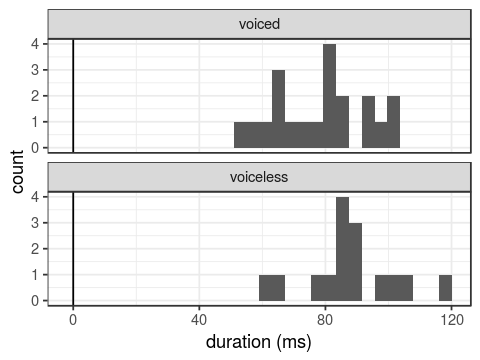

In [21]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(subset(bg_audio_timings_with_metadata, plural_duration != 0)) + geom_histogram(aes(x=plural_duration)
) + facet_wrap(~voicing, ncol=1) + theme_bw() + geom_vline(xintercept=0) +xlab('duration (ms)')

## Prepositional Phrase Duration (Background version)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


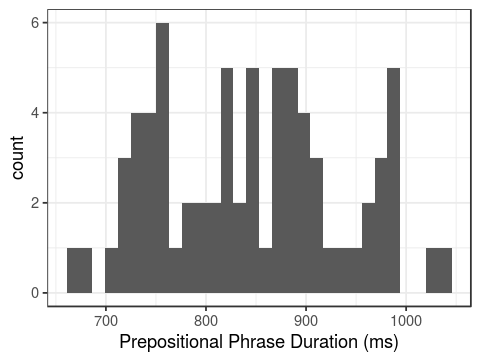

In [22]:
mean_pp_duration= mean(bg_audio_timings$pp_duration, na.rm=T) * 1000
options(repr.plot.width=4, repr.plot.height=3)
ggplot(bg_audio_timings) + geom_histogram(aes(x=pp_duration * 1000)) + theme_bw() + xlab('Prepositional Phrase Duration (ms)')

## Plural  Segment Duration (Simplified version)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


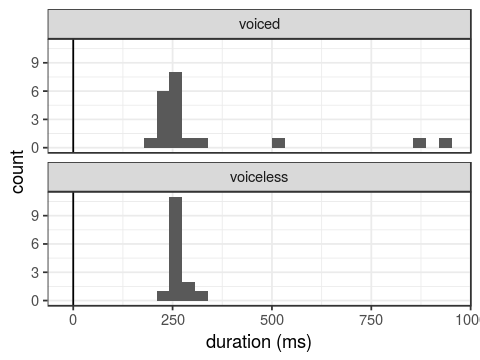

In [23]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(subset(rb_audio_timings_with_metadata, plural_duration > 0)) + geom_histogram(aes(x=plural_duration)
) + facet_wrap(~voicing, ncol=1) + theme_bw() + geom_vline(xintercept=0) +xlab('duration (ms)')

In [ ]:
#[ ]!!! check on the three outliers

# Preprocess Eyetracking Data

In [50]:
# plz parallelize me
source('PLEARN_analysis_helper.R')
ed = list()
for (i in 1:nrow(subject_info)){
    participant = subject_info[i,]
    if (participant$filename == '' | is.null(participant$filename) | participant$include == 0){
        print(paste0('No eyetracking data for ', participant$id,' (or excluded), skipping...'))
    } else {
        if (participant$expt_version == 'scene'){
            audio_timings = bg_audio_timings
        } else if (participant$expt_version == 'redblue') {
            audio_timings = rb_audio_timings
        } else {
            stop('expt_version not recognized')
        }        
        ed[[participant$id]] = analyzeEyetrackingParticipant(
            'results/', 
            participant$filename, 
            audio_timings, 
            participant$type)
    }
}

[1] "processing results/smflip3_fixreport.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13104, not 13103”

[1] "processing results/pl00_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15018, not 15017”

[1] "processing results/pl01_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14335, not 14334”

[1] "processing results/pl03_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double()
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 6064, not 6063”

[1] "No eyetracking data for pl04 (or excluded), skipping..."
[1] "No eyetracking data for pl05 (or excluded), skipping..."
[1] "processing results/pl06_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13842, not 13841”

[1] "processing results/pl07_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15062, not 15061”

[1] "processing results/pl08_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15062, not 15061”

[1] "processing results/pl09_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15543, not 15542”

[1] "processing results/pl10_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 7542, not 7541”

[1] "processing results/adultpl12_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14246, not 14245”

[1] "processing results/adultpl13_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15302, not 15301”

[1] "processing results/adultpl14_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14431, not 14430”

[1] "processing results/adultpl15_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15050, not 15049”

[1] "processing results/adultpl16_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14415, not 14414”

[1] "processing results/pl11_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 10897, not 10896”

[1] "processing results/pl13_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 608
[1] "will write to:"
[1] "results/pl13_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 10705, not 10704”

[1] "processing results/pl14_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 520
[1] "will write to:"
[1] "results/pl14_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 12993, not 12992”

[1] "processing results/pl15_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 725
[1] "will write to:"
[1] "results/pl15_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 11974, not 11973”

[1] "processing results/pl16_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 681
[1] "will write to:"
[1] "results/pl16_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14993, not 14992”

[1] "processing results/pl17_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 599
[1] "will write to:"
[1] "results/pl17_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 10580, not 10579”

[1] "processing results/pl18_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 748
[1] "will write to:"
[1] "results/pl18_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14385, not 14384”

[1] "processing results/pl19_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 546
[1] "will write to:"
[1] "results/pl19_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13635, not 13634”

[1] "processing results/pl20_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 735
[1] "will write to:"
[1] "results/pl20_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14247, not 14246”

[1] "No eyetracking data for pl21 (or excluded), skipping..."
[1] "processing results/pl22_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 805
[1] "will write to:"
[1] "results/pl22_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14177, not 14176”

[1] "processing results/pl23_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 591
[1] "will write to:"
[1] "results/pl23_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 8662, not 8661”

[1] "processing results/pl24_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 703
[1] "will write to:"
[1] "results/pl24_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 12881, not 12880”

[1] "processing results/pl25_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 545
[1] "will write to:"
[1] "results/pl25_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 9177, not 9176”

[1] "No eyetracking data for pl26 (or excluded), skipping..."
[1] "processing results/pl27_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 617
[1] "will write to:"
[1] "results/pl27_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14804, not 14803”

[1] "processing results/pl28_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 604
[1] "will write to:"
[1] "results/pl28_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13372, not 13371”

[1] "processing results/pl29_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 700
[1] "will write to:"
[1] "results/pl29_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13464, not 13463”

[1] "processing results/pl30_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 664
[1] "will write to:"
[1] "results/pl30_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 10928, not 10927”

[1] "processing results/pl31_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 489
[1] "will write to:"
[1] "results/pl31_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13773, not 13772”

[1] "processing results/pl33_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 665
[1] "will write to:"
[1] "results/pl33_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14083, not 14082”

[1] "processing results/pl36_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 722
[1] "will write to:"
[1] "results/pl36_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14722, not 14721”

[1] "processing results/plearn_adults_plad01.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 451
[1] "will write to:"
[1] "results/plearn_adults_plad01.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15653, not 15652”

[1] "processing results/plearn_adults_plad02.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 591
[1] "will write to:"
[1] "results/plearn_adults_plad02.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14061, not 14060”

[1] "processing results/plearn_adults_plad03.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 647
[1] "will write to:"
[1] "results/plearn_adults_plad03.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14231, not 14230”

[1] "processing results/plearn_adults_plad04.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 723
[1] "will write to:"
[1] "results/plearn_adults_plad04.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 12717, not 12716”

[1] "processing results/plearn_adults_plad05.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 837
[1] "will write to:"
[1] "results/plearn_adults_plad05.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14959, not 14958”

[1] "processing results/plearn_adults_plad06.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 388
[1] "will write to:"
[1] "results/plearn_adults_plad06.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15043, not 15042”

[1] "processing results/plearn_adults_plad07.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 729
[1] "will write to:"
[1] "results/plearn_adults_plad07.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14565, not 14564”

[1] "processing results/plearn_adults_plad08.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 302
[1] "will write to:"
[1] "results/plearn_adults_plad08.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15094, not 15093”

[1] "processing results/plearn_adults_plad09.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 588
[1] "will write to:"
[1] "results/plearn_adults_plad09.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15189, not 15188”

[1] "processing results/plearn_adults_plad10.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 595
[1] "will write to:"
[1] "results/plearn_adults_plad10.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13732, not 13731”

[1] "processing results/plearn_adults_plad11.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 468
[1] "will write to:"
[1] "results/plearn_adults_plad11.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 15188, not 15187”

[1] "processing results/plearn_adults_plad12.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 567
[1] "will write to:"
[1] "results/plearn_adults_plad12.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14599, not 14598”

[1] "processing results/plearn_adults_plad13.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 617
[1] "will write to:"
[1] "results/plearn_adults_plad13.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14720, not 14719”

[1] "processing results/plearn_adults_plad14.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 743
[1] "will write to:"
[1] "results/plearn_adults_plad14.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 13923, not 13922”

[1] "processing results/plearn_adults_plad15.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 624
[1] "will write to:"
[1] "results/plearn_adults_plad15.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.
Warning message:
“Length of logical index must be 1 or 14619, not 14618”

In [51]:
length(ed)

[1] 49

# Preprocess / Plot Production Data

We preprocess the production data at this point because we want to be able to use production scores as a grouping variable in the eyetracking analysis

In [25]:
p_coded = read.csv('productions_coded.csv', stringsAsFactors=F)
print(names(p_coded))
print(nrow(p_coded))

[1] "child"         "itemId"        "Lemma"         "Singular.IPA" 
[5] "Singular.Code" "Plural.IPA"    "Plural.Code"   "Comments"     
[1] 400


In [26]:
codebook = c(
    'No data (0)',
    'No verbal response (1)',
    'Not identifiable/babble (2)',
    'Other word (not noun) (3)',
    'Noun from context (4)',
    'Singular form (5)',
    'Non-conventional plural form (6)',
    'Plural form, approximate articulation (7)',
    'Plural form, adult-like articulation (8)' 
)

codes = data.frame(code = seq(0,8), description = codebook)
codes$description = factor(codes$description, levels = codebook)

In [27]:
# get the item properties into here
pt_ds = read.csv('../PLEARN_experiments/plearn_productiveTask_datasource.csv')
p_coded = merge(p_coded, pt_ds, by.x='Lemma', by.y='s_form')
nrow(p_coded) # the decrease is because the remainder are practice

[1] 320

In [28]:
s_codes = aggregate(itemId ~ Singular.Code + child, p_coded, length)
names(s_codes) = c('code', 'child', 'count')
s_codes = merge(s_codes, codes)
s_codes$s_pl ='singular'
head(s_codes)

code child count description            s_pl    
1 0    pl01   1    No data (0)            singular
2 0    pl18   4    No data (0)            singular
3 0    pl24   1    No data (0)            singular
4 0    pl20   5    No data (0)            singular
5 1    pl05  14    No verbal response (1) singular
6 1    pl15   1    No verbal response (1) singular

In [29]:
p_codes = aggregate(itemId ~ Plural.Code + child, p_coded, length)
names(p_codes) = c('code', 'child','count')
p_codes = merge(p_codes, codes)
p_codes$s_pl = 'plural'
head(p_codes)

code child count description            s_pl  
1 0    pl01  2     No data (0)            plural
2 0    pl18  3     No data (0)            plural
3 0    pl19  1     No data (0)            plural
4 0    pl20  4     No data (0)            plural
5 1    pl01  2     No verbal response (1) plural
6 1    pl03  2     No verbal response (1) plural

In [30]:
code_counts = rbind.fill(s_codes, p_codes)
code_counts$s_pl = factor(code_counts$s_pl, levels =c('singular','plural'))
head(code_counts)

code child count description            s_pl    
1 0    pl01   1    No data (0)            singular
2 0    pl18   4    No data (0)            singular
3 0    pl24   1    No data (0)            singular
4 0    pl20   5    No data (0)            singular
5 1    pl05  14    No verbal response (1) singular
6 1    pl15   1    No verbal response (1) singular

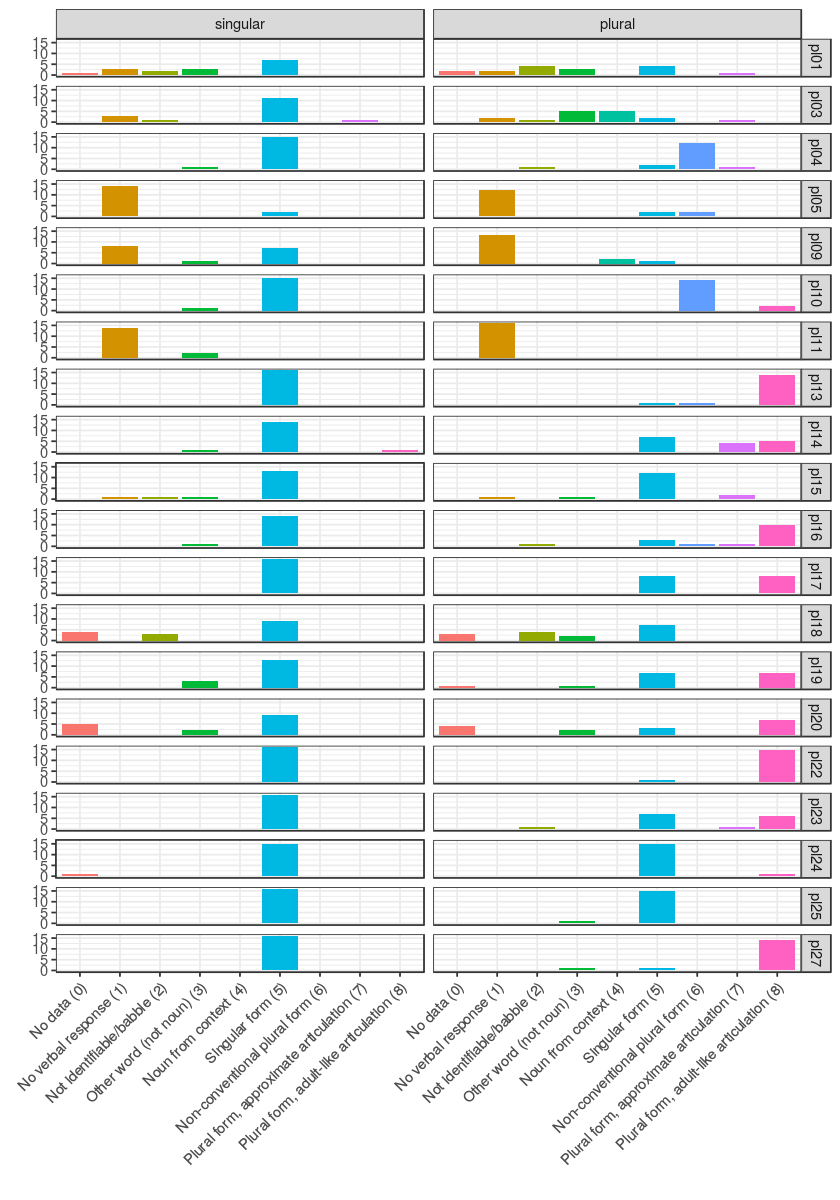

In [31]:
options(repr.plot.width=7, repr.plot.height=10)
ggplot(code_counts) + geom_bar(aes(x=description, y=count, fill=description), stat='identity'
) + theme_bw() +theme(legend.position="none") + theme(axis.text.x = element_text(angle = 45, 
hjust = 1)) + xlab('') + ylab('') + facet_grid(child~s_pl)

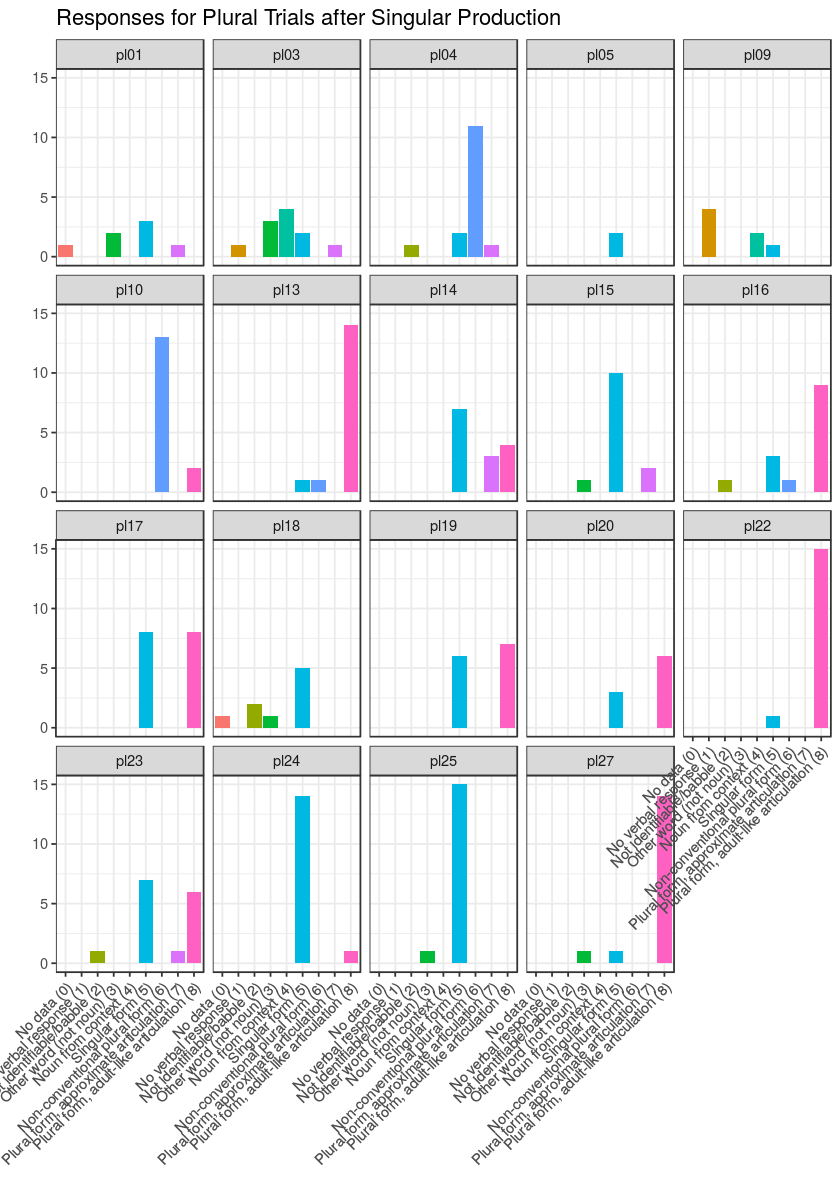

In [33]:
# coded trials after  singular productions, #5
p_codes = aggregate(itemId ~ Plural.Code + child, subset(p_coded, Singular.Code == 5), length)
names(p_codes) = c('code', 'child','count')
p_codes = merge(p_codes, codes)
p_codes$type = 'plural'
ggplot(p_codes) + geom_bar(aes(x=description, y=count, fill=description), stat='identity'
) + theme_bw() +theme(legend.position="none") + theme(axis.text.x = element_text(angle = 45, 
hjust = 1)) + xlab('') + ylab(''
) + ggtitle('Responses for Plural Trials after Singular Production') + facet_wrap(~child)

 [ ] Sort the two above using the child age

# Compute Production Scores

In [174]:
# note that both of these are subset to singular succeses
computeProductionScores = function(codes, method = 'narrow'){
    
    if (method == 'narrow'){
        # if they marked the plural in some way,was it adult-like?
        sum(codes %in% c(7,8)) / sum(codes %in% seq(6,8))
    } else if (method == 'broad') {
        # did they mark the plural?
        sum(codes %in% c(7,8)) / sum(codes %in% seq(2,8))
    }
}


In [175]:
narrow_production_scores = aggregate(Plural.Code ~ child, subset(p_coded, Singular.Code == 5), computeProductionScores)
names(narrow_production_scores) = c('participant_name', 'narrow_score')
broad_production_scores = aggregate(Plural.Code ~ child, subset(p_coded, Singular.Code == 5), function(x){computeProductionScores(x,'broad')})
names(broad_production_scores) = c('participant_name','broad_score')

In [176]:
if (!("broad_score" %in% names(subject_info))){
    subject_info = merge(merge(subject_info, narrow_production_scores, by='participant_name', all=T),
    broad_production_scores, all=T, by='participant_name')
}

In [177]:
subset(subject_info, !is.na(narrow_score))

participant_name id   include filename            age_in_days gender type 
7  pl01             pl01  1      pl01_fixations.txt   788        F      child
8  pl03             pl03  1      pl03_fixations.txt   810        F      child
9  pl04             NA   NA      NA                    NA        NA     NA   
15 pl10             pl10  1      pl10_fixations.txt   897        M      child
17 pl13             pl13  1      pl13_fixations.xlsx 1450        M      child
18 pl14             pl14  1      pl14_fixations.xlsx 1057        M      child
19 pl15             pl15  1      pl15_fixations.xlsx  876        F      child
21 pl16             NA   NA      NA                    NA        NA     NA   
22 pl17             pl17  1      pl17_fixations.xlsx  926        F      child
24 pl19             pl19  1      pl19_fixations.xlsx  947        M      child
25 pl20             pl20  1      pl20_fixations.xlsx 1008        F      child
27 pl22             pl22  1      pl22_fixations.xlsx 1408        M      child
28 pl23             pl23  1      pl23_fixations.xlsx  850        M      child
29 pl24             pl24  1      pl24_fixations.xlsx 1091        M      child
32 pl27             pl27  1      pl27_fixations.xlsx 1107        F      child
   expt_version comment age_in_months narrow_score broad_score
7  scene                25.83607      1.00000000   0.16666667 
8  scene                26.55738      1.00000000   0.10000000 
9  NA           NA            NA      0.08333333   0.06666667 
15 scene                29.40984      0.13333333   0.13333333 
17 scene                47.54098      0.93333333   0.87500000 
18 scene                34.65574      1.00000000   0.50000000 
19 scene                28.72131      1.00000000   0.15384615 
21 NA           NA            NA      0.90000000   0.64285714 
22 scene                30.36066      1.00000000   0.50000000 
24 scene                31.04918      1.00000000   0.53846154 
25 scene                33.04918      1.00000000   0.66666667 
27 scene                46.16393      1.00000000   0.93750000 
28 scene                27.86885      1.00000000   0.46666667 
29 scene                35.77049      1.00000000   0.06666667 
32 scene                36.29508      1.00000000   0.87500000

# Associate Participant Information With All Records

In [56]:
ed_df = do.call('rbind', ed)
#augment ed_df with the properties from subject info
ed_df = merge(ed_df, subject_info, by='filename')
nrow(ed_df)

[1] 661657

In [57]:
# add the trial order as a grouping variable
ed_df$first3 = 'remainder'
ed_df$first3[ed_df$TRIAL_INDEX <= 7] = 'first 3 test trials'

# Aggregate Eyetracking Timecourses

## Background / PP Version

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

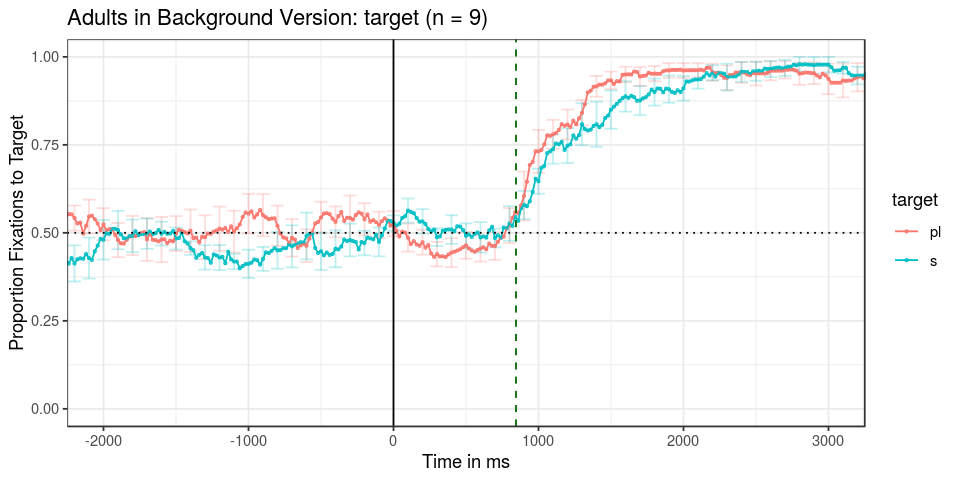

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

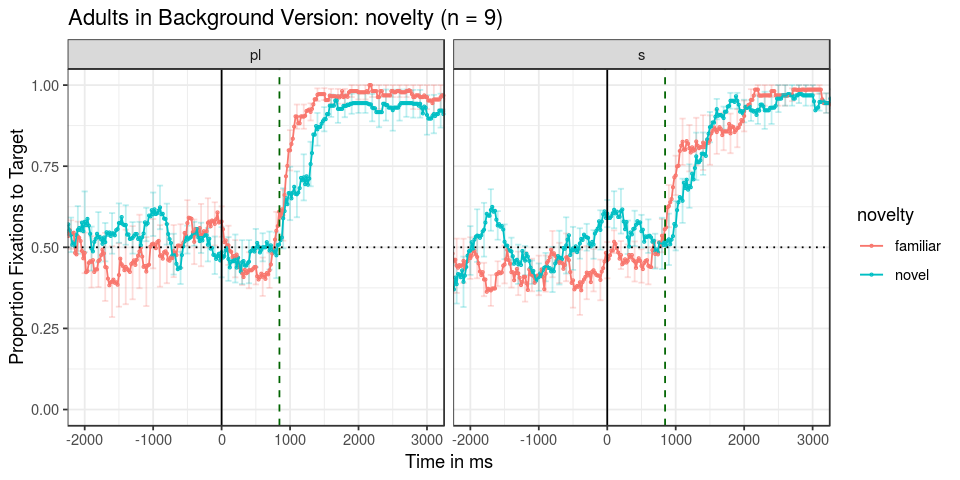

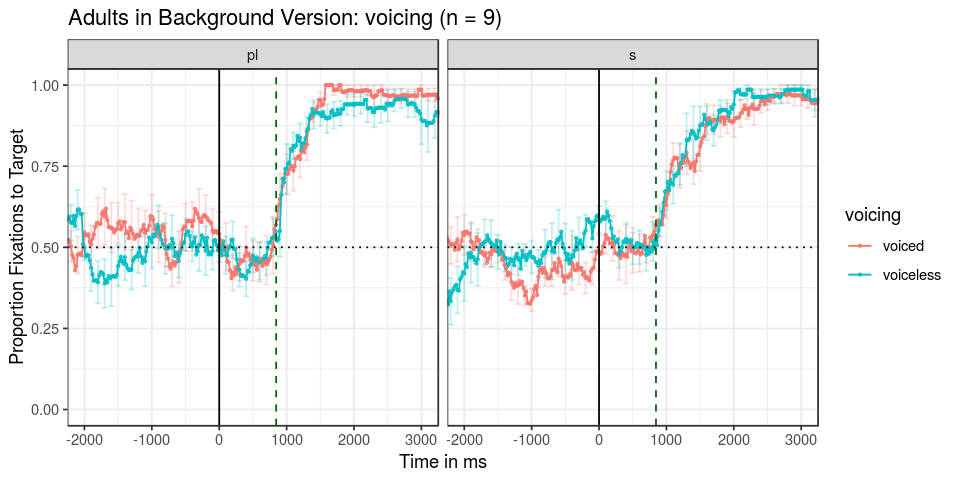

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


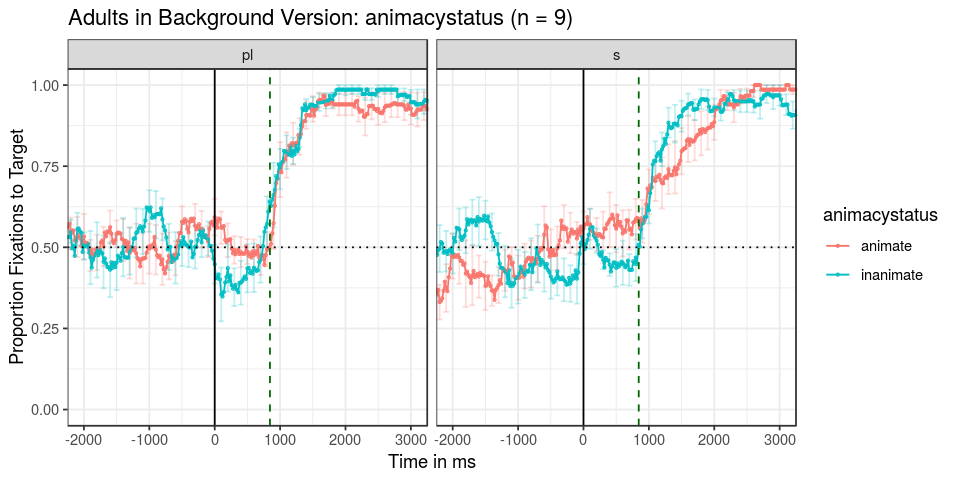

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


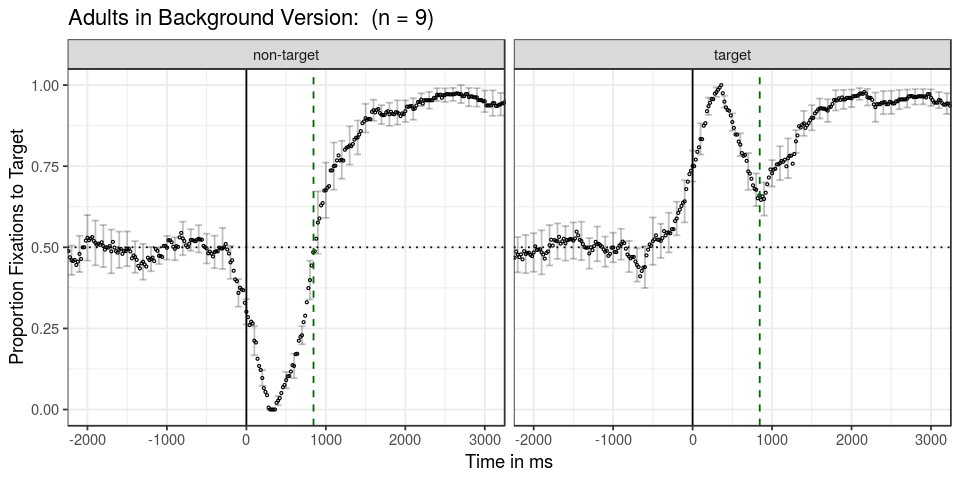

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"
[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

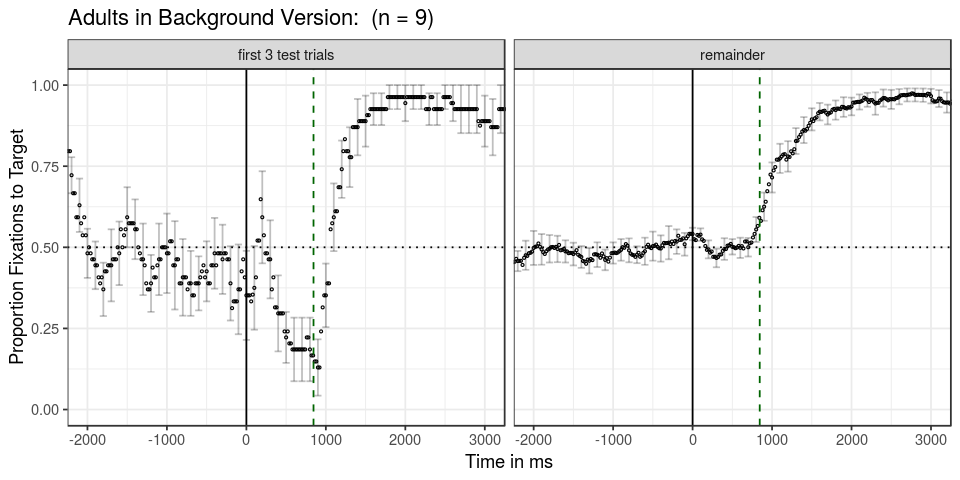

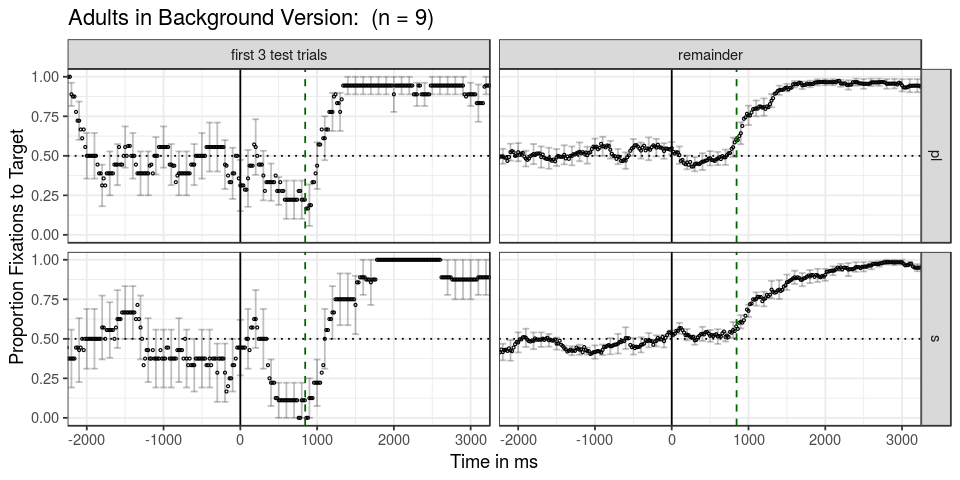

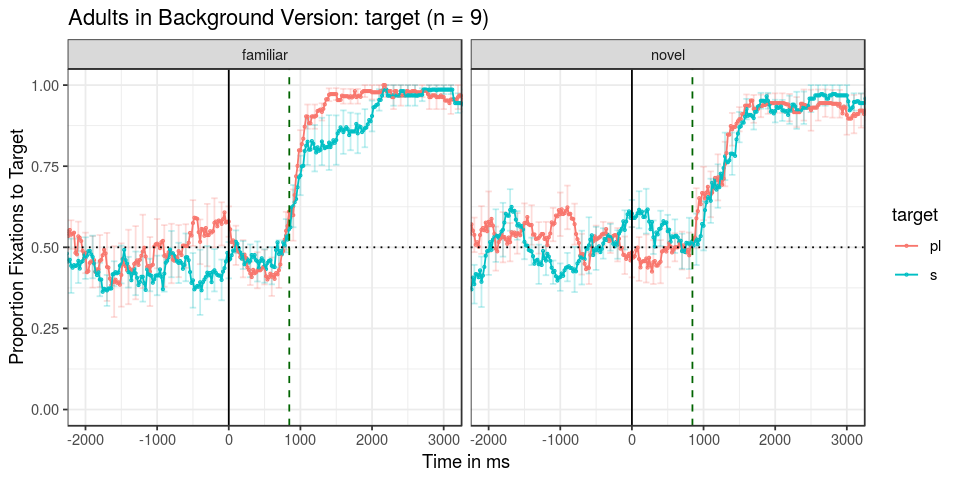

In [58]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'adult' & expt_version == 'scene'",
    mean_pp_duration = mean_pp_duration, group_title = 'Adults in Background Version')

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

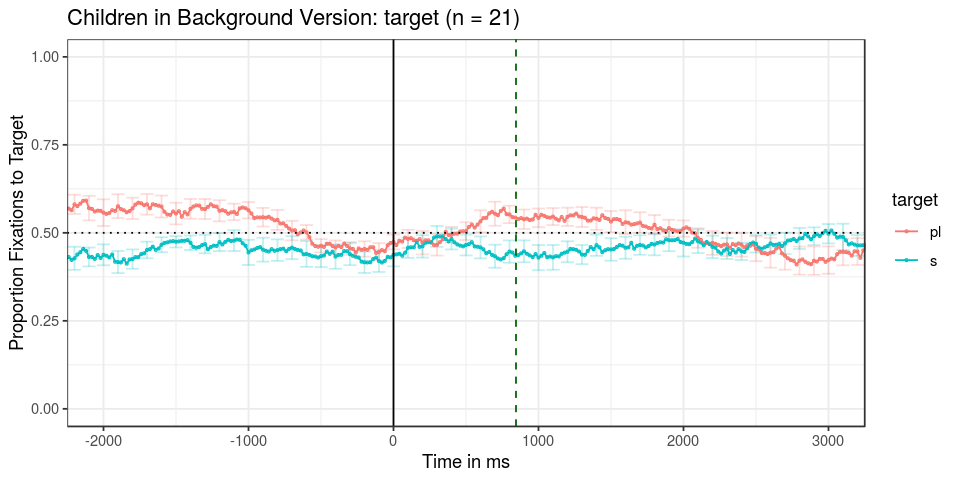

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

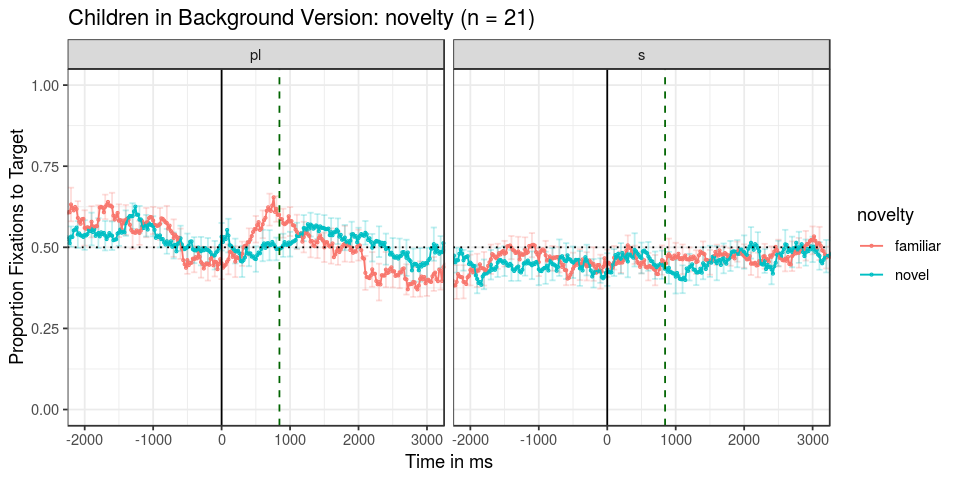

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

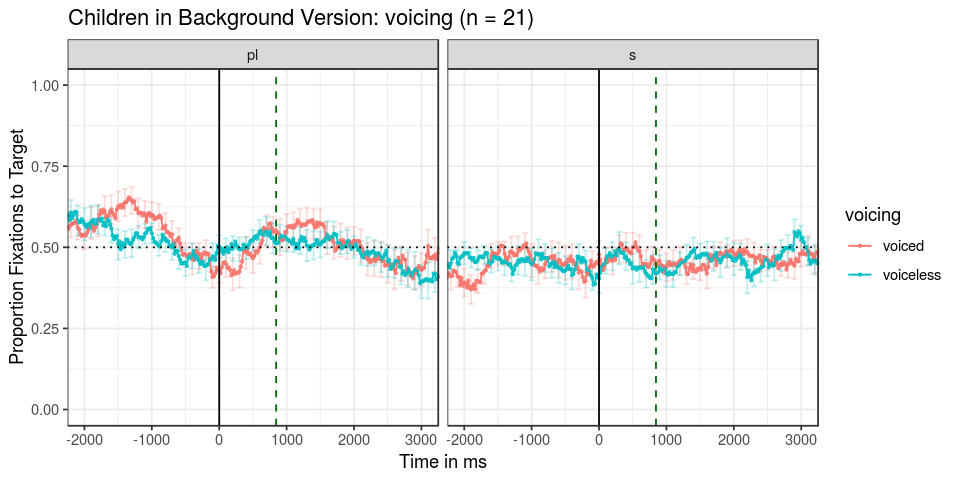

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

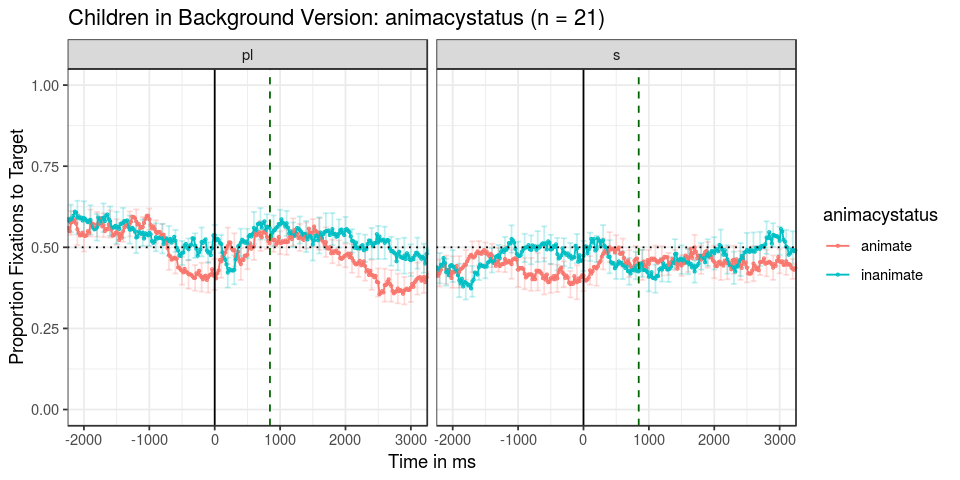

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

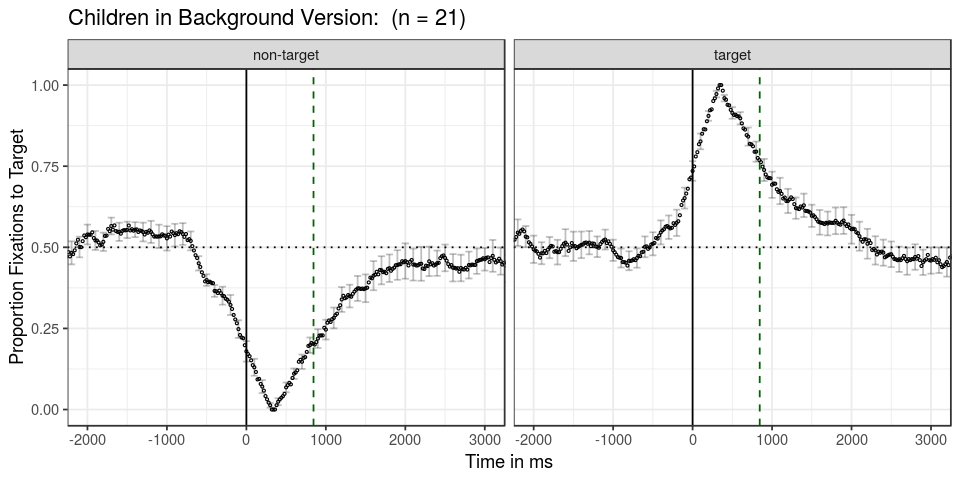

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

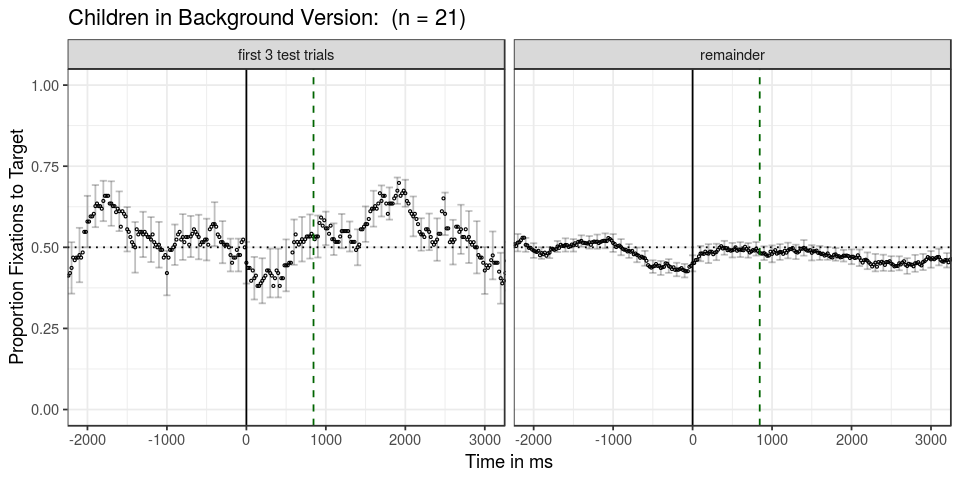

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

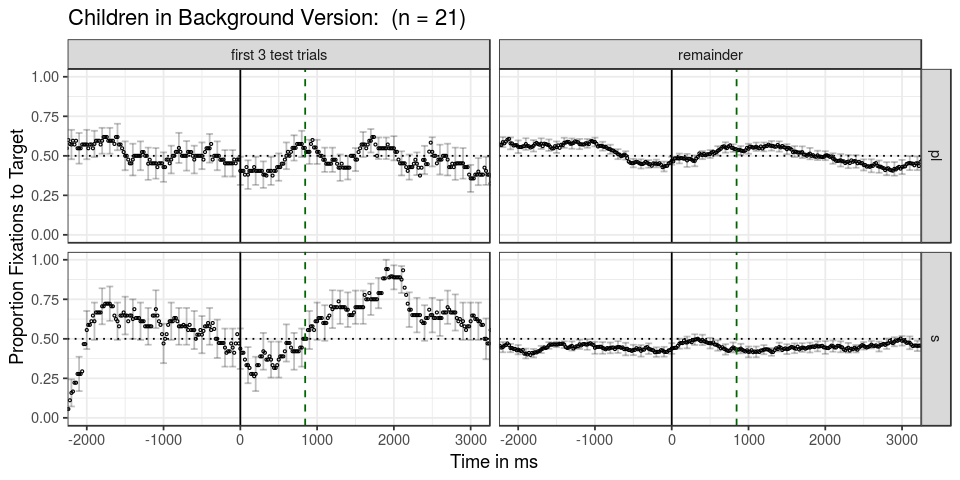

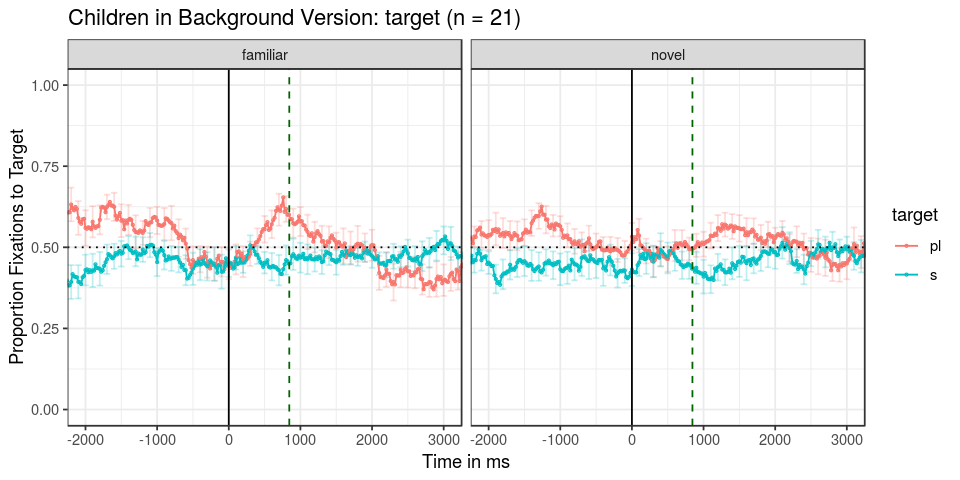

In [59]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'child'& expt_version == 'scene'",
    mean_pp_duration = mean_pp_duration, group_title = 'Children in Background Version')

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

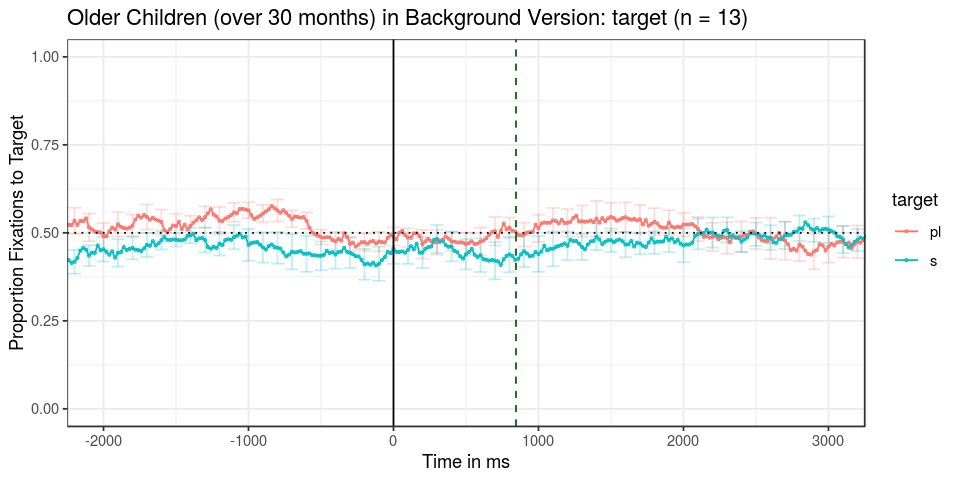

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

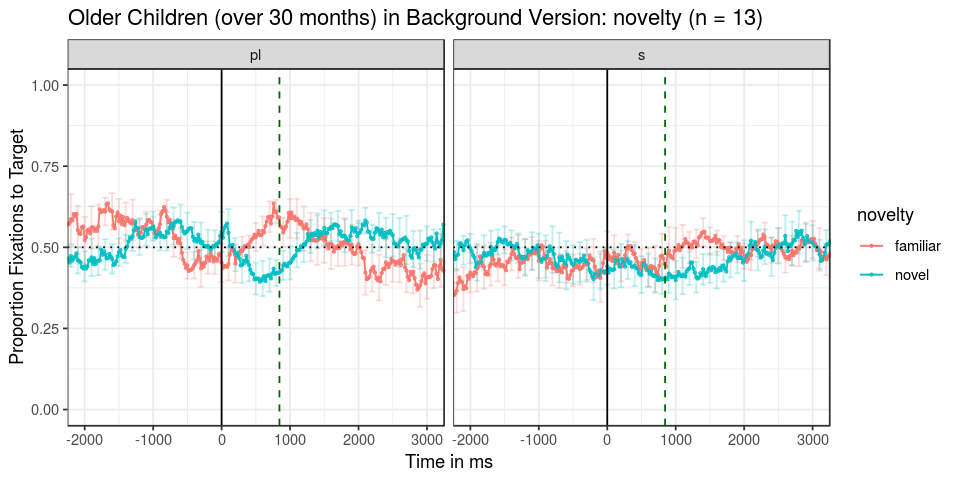

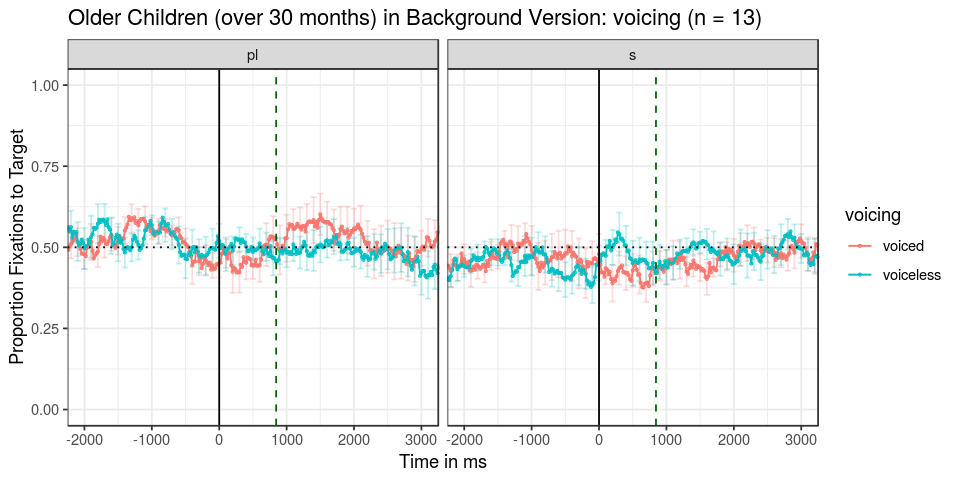

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


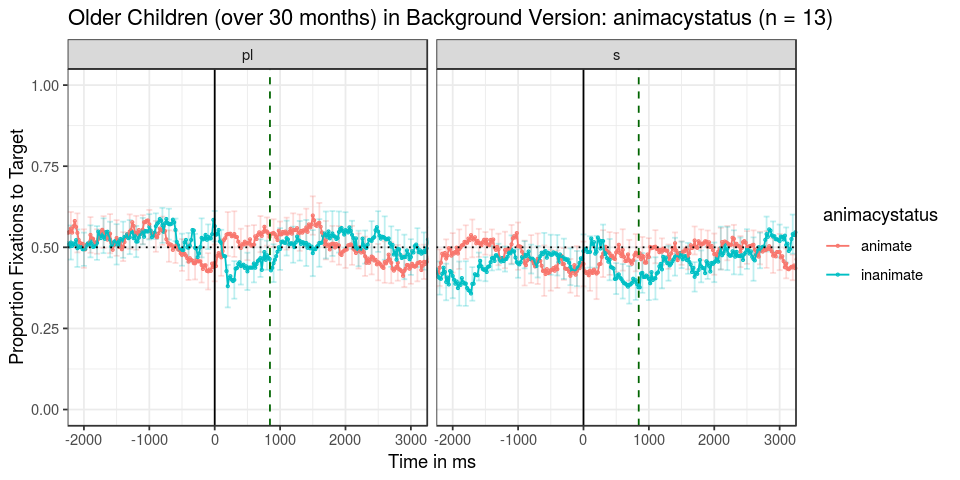

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


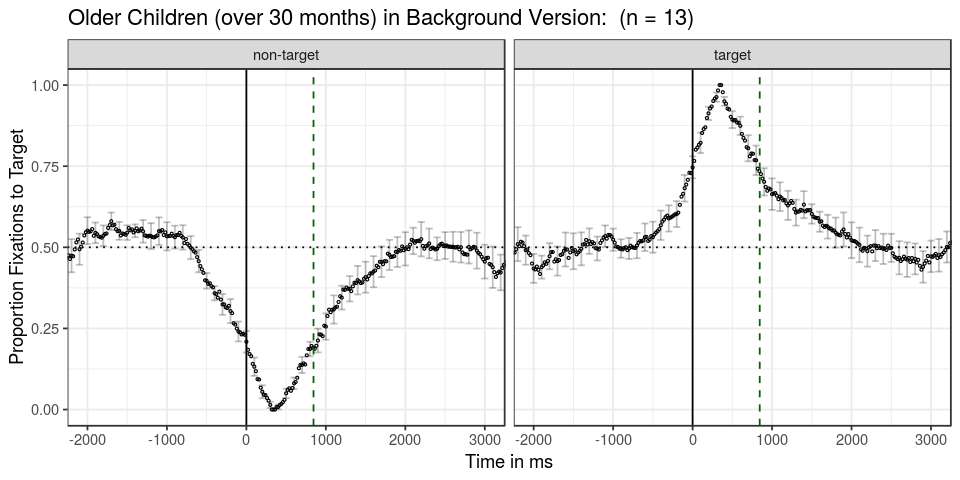

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"
[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

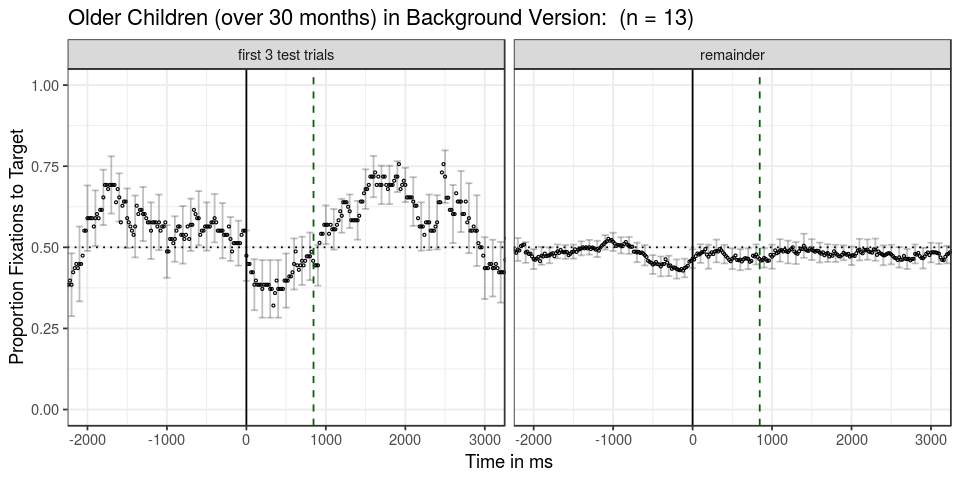

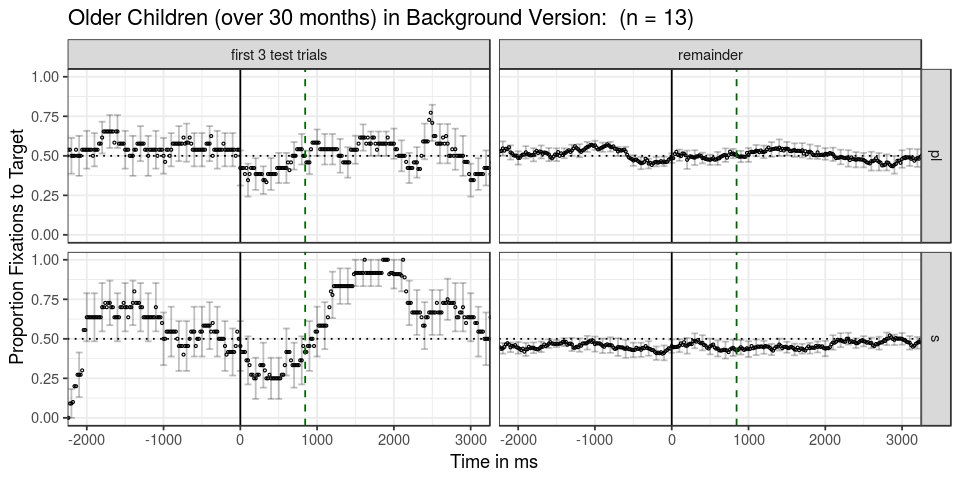

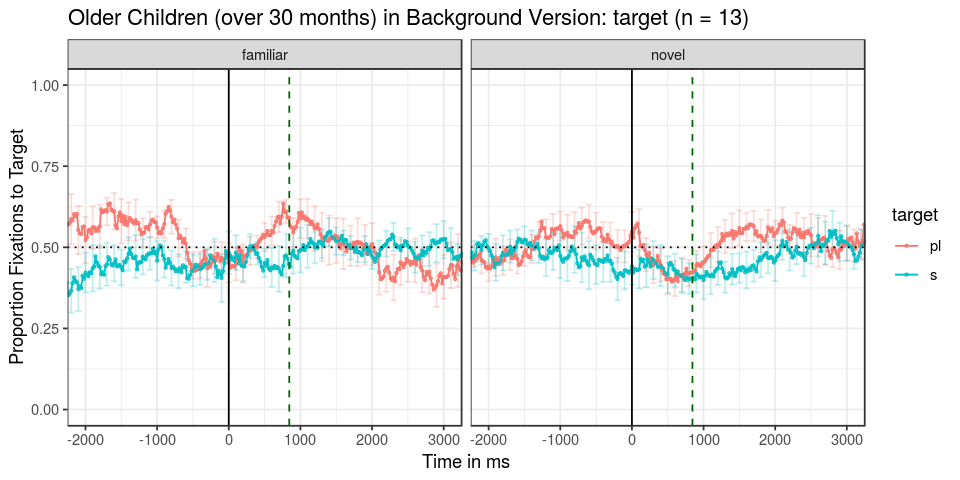

In [60]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'child' & age_in_days >= 915 & expt_version == 'scene'",
    mean_pp_duration = mean_pp_duration, group_title = 'Older Children (over 30 months) in Background Version')

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

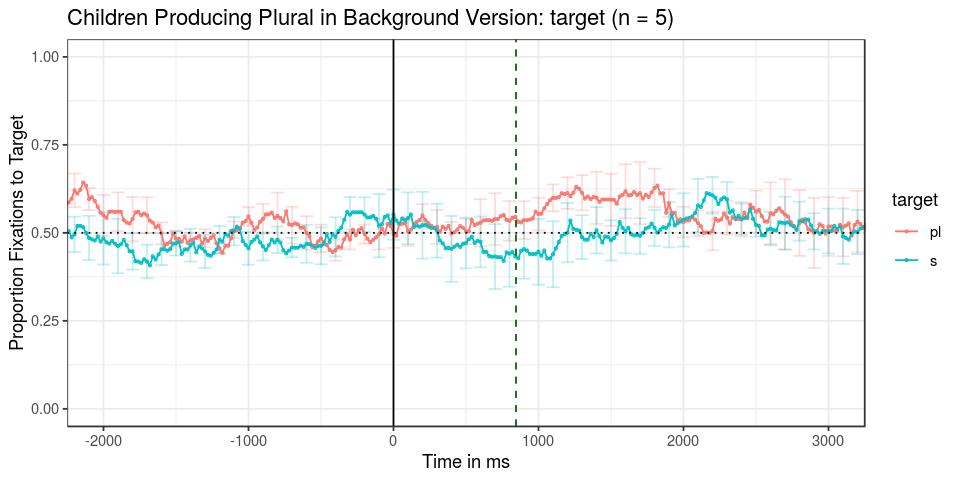

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

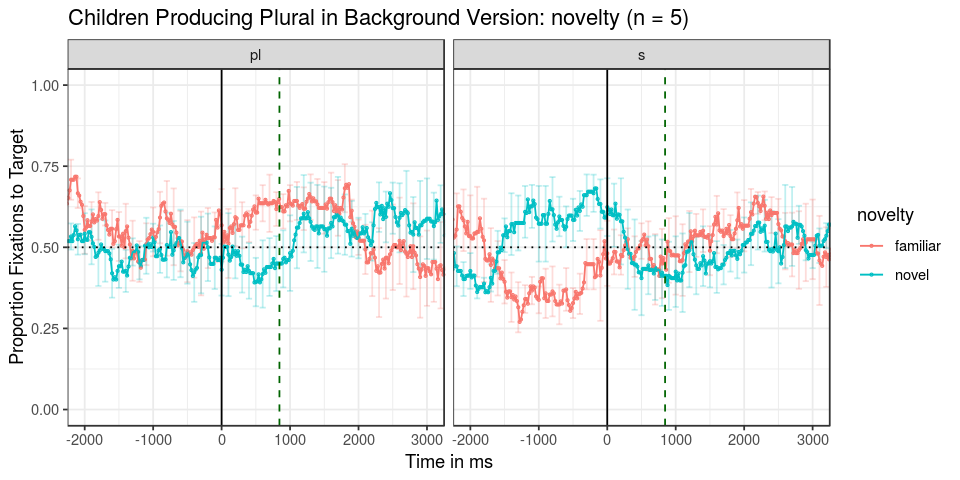

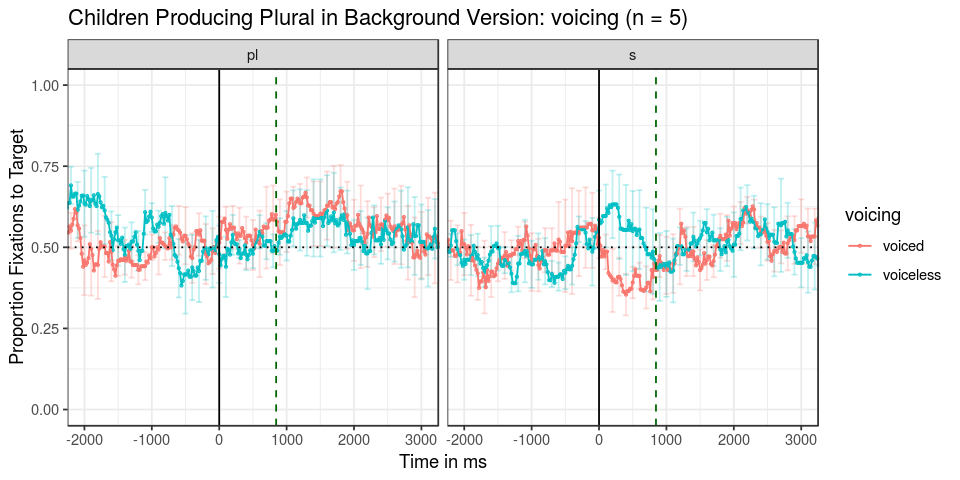

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

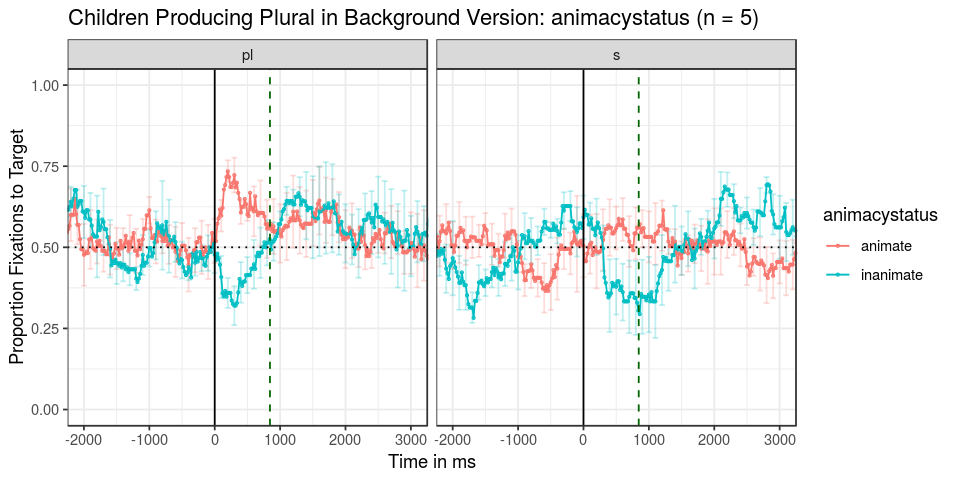

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

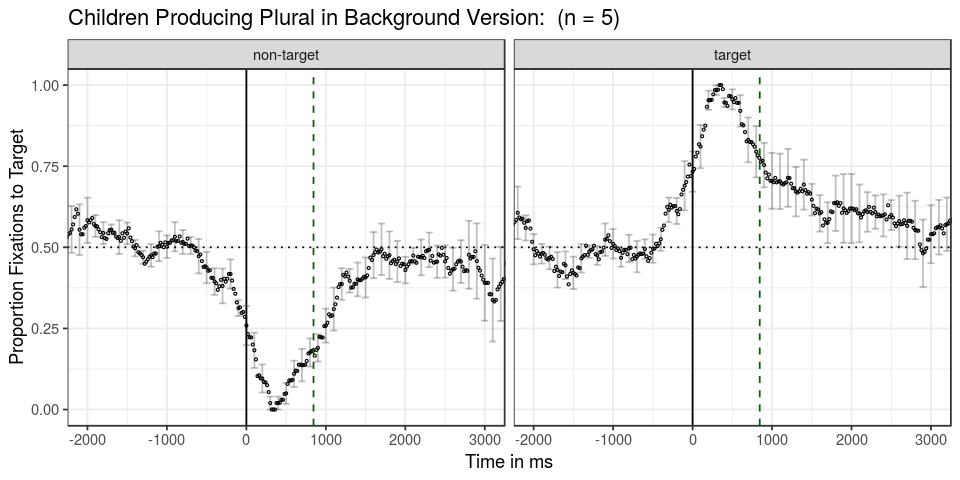

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"


Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

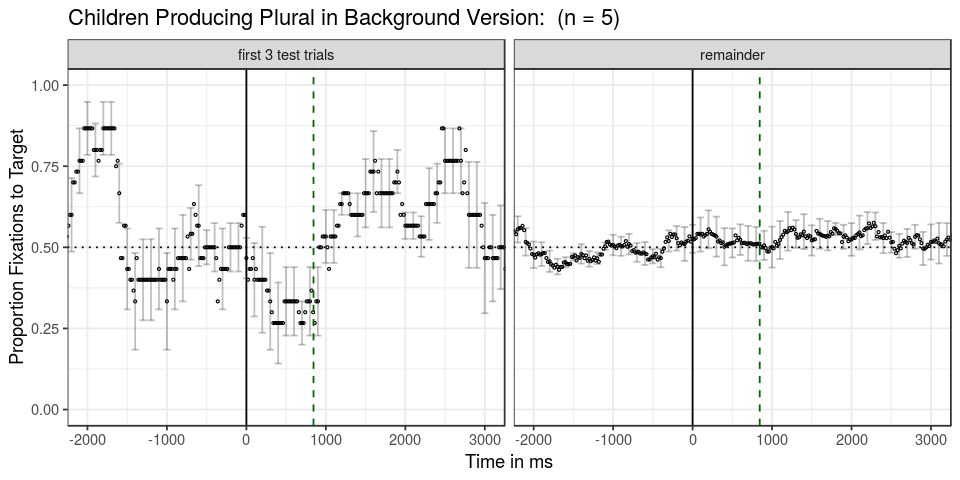

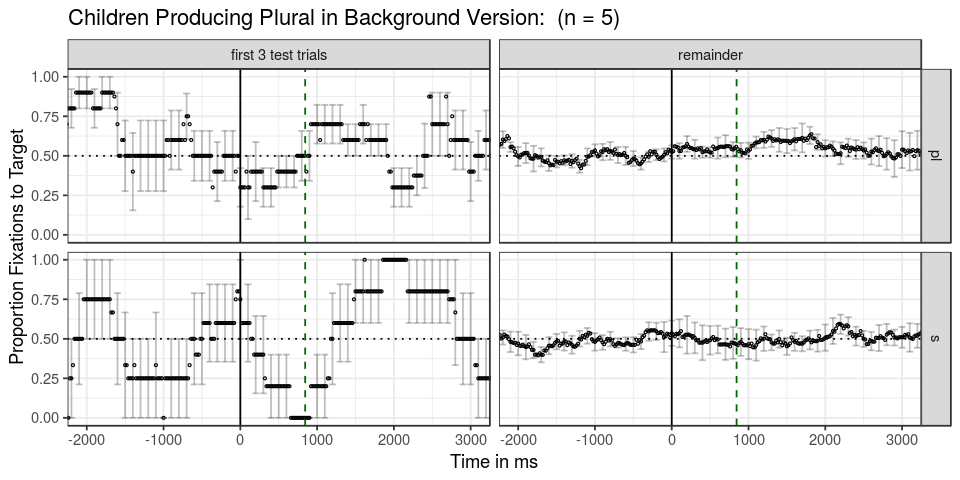

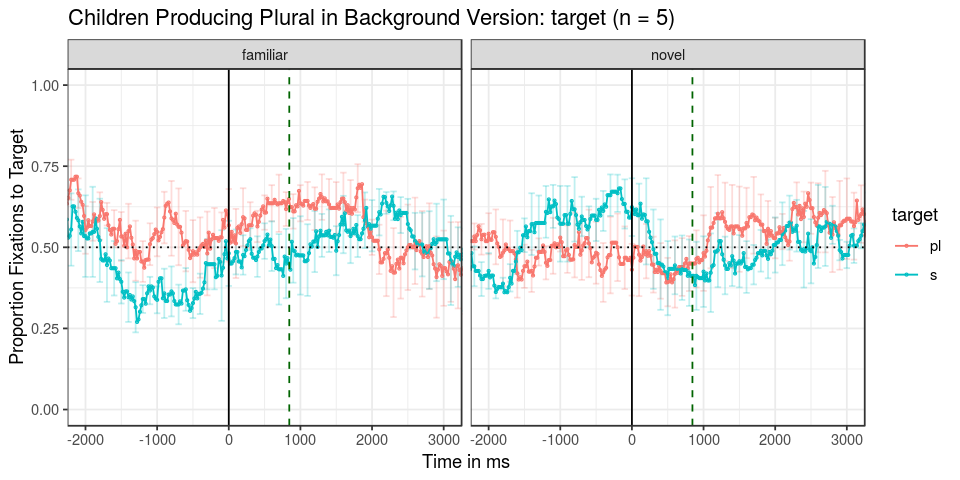

In [67]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'child' & broad_score > .5 & expt_version == 'scene' ",
    mean_pp_duration = mean_pp_duration, group_title = 'Children Producing Plural in Background Version')

## Red/Blue (Simplified) Version

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

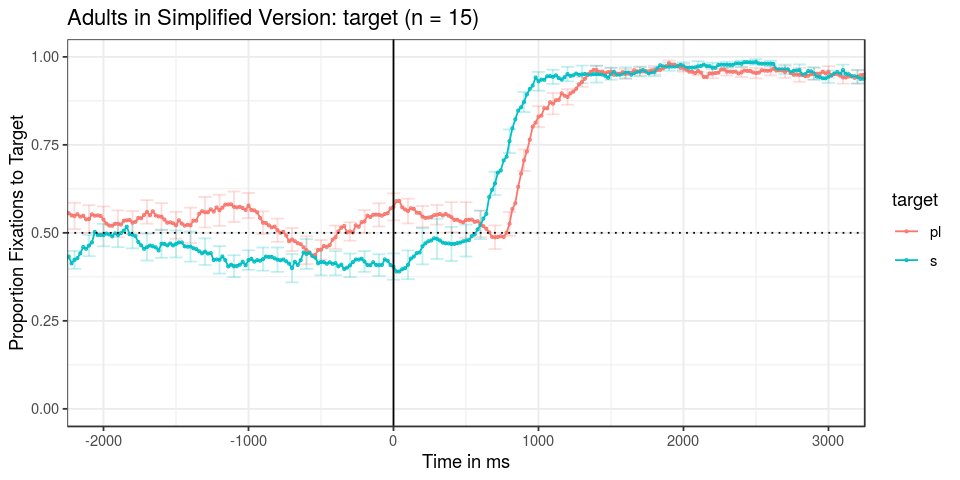

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

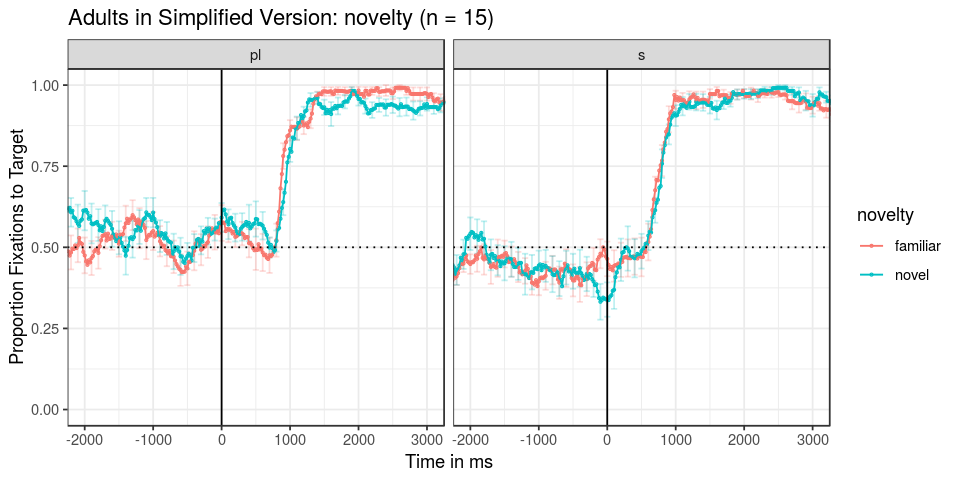

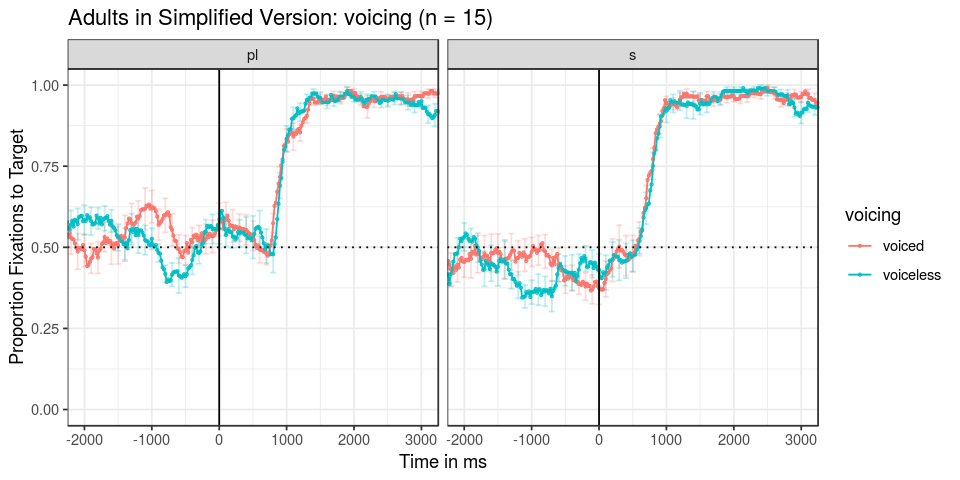

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


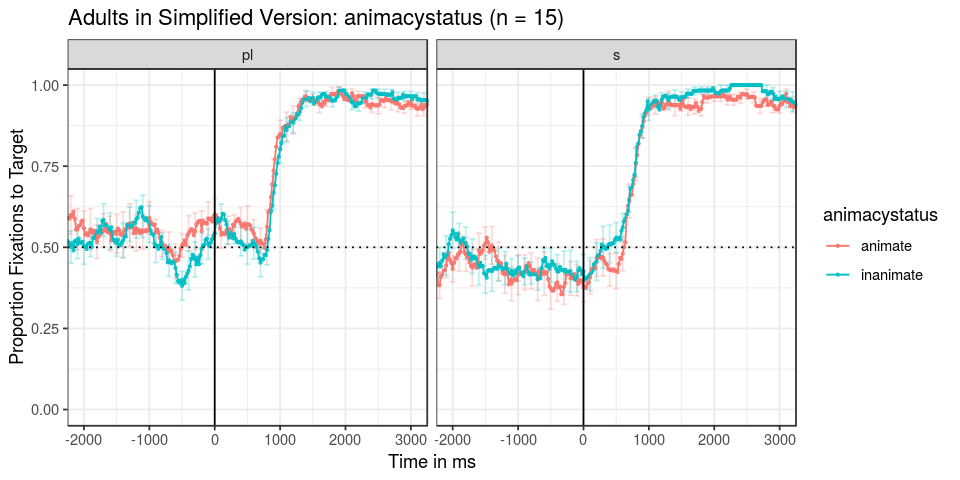

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


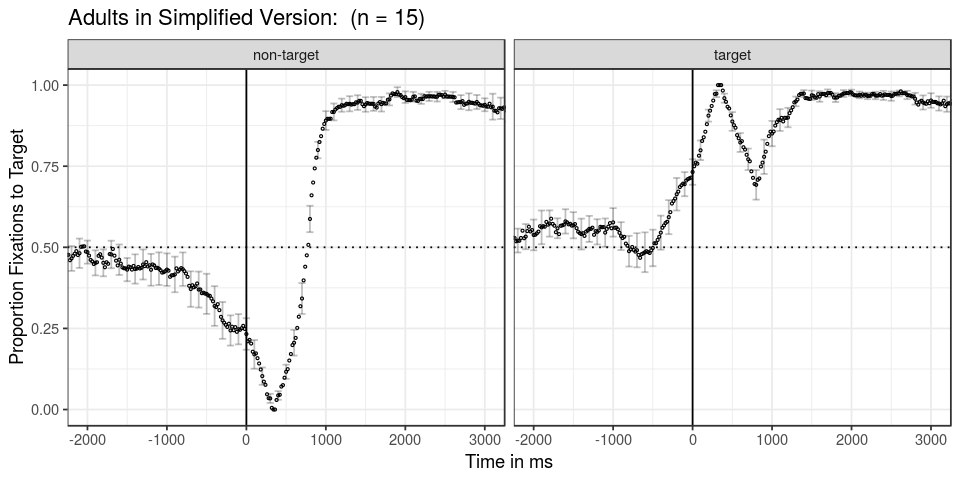

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"
[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

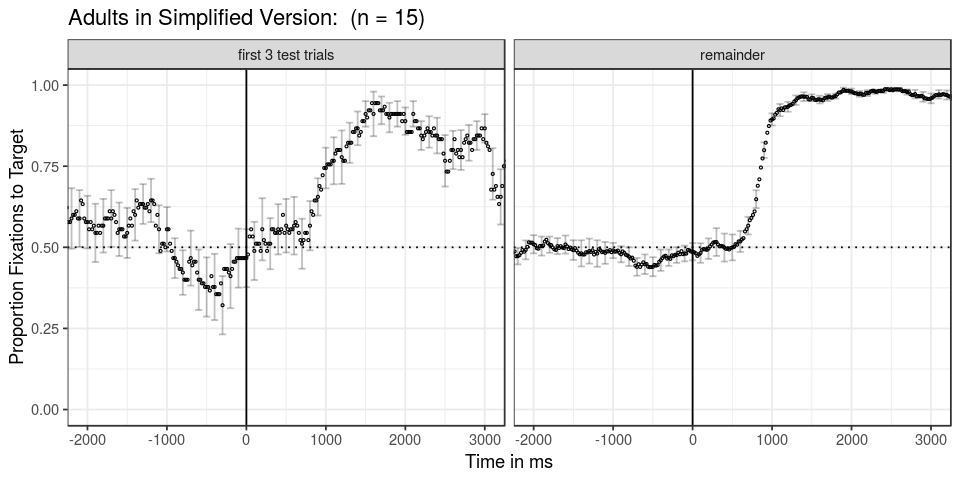

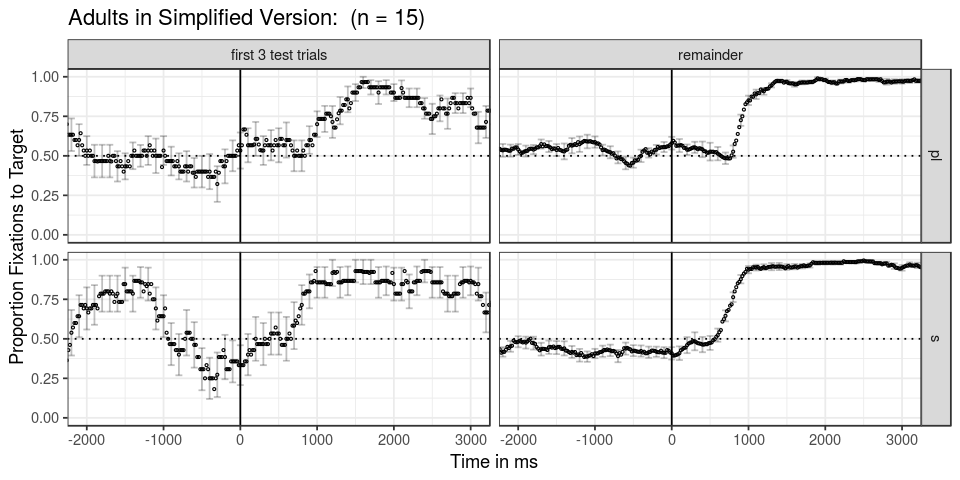

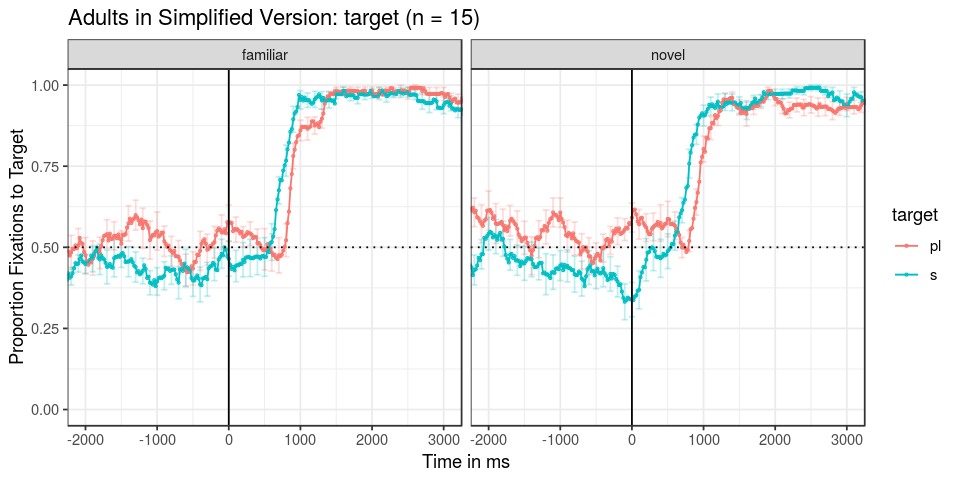

In [68]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'adult' & expt_version == 'redblue'",
    mean_pp_duration = NULL, group_title = 'Adults in Simplified Version')

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

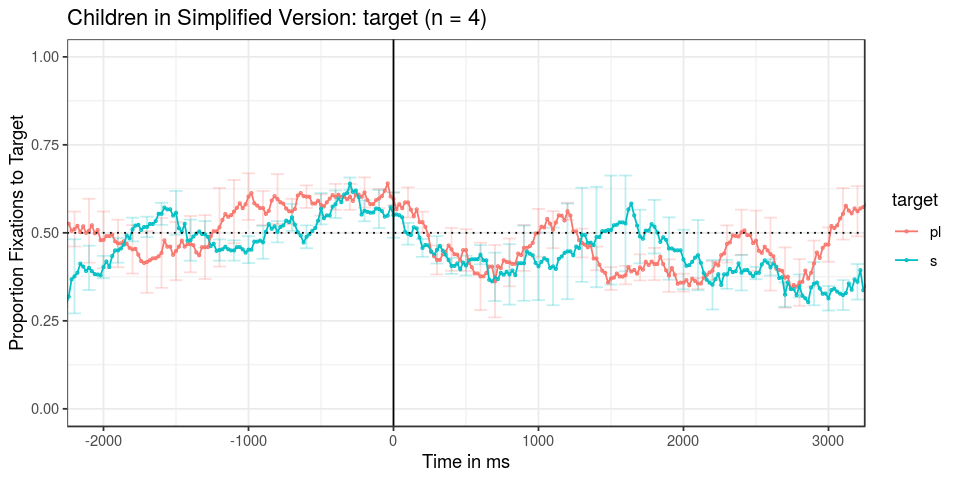

Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

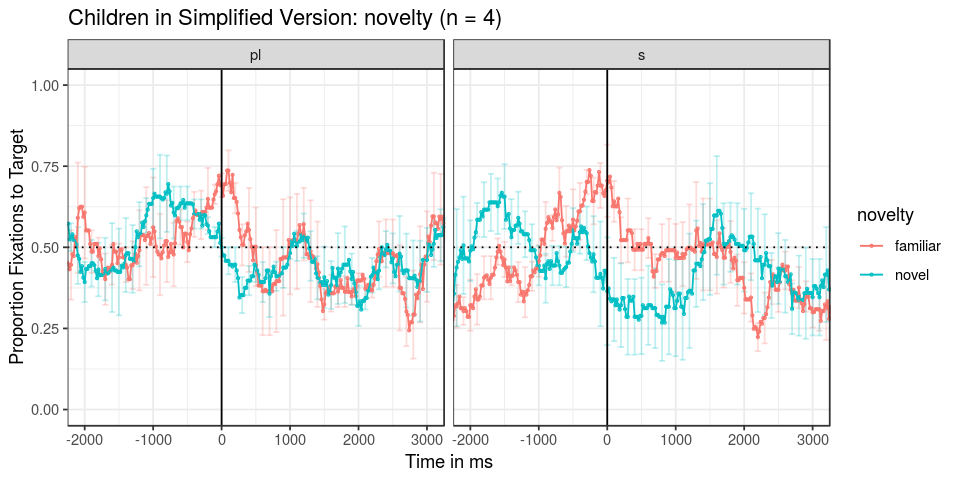

Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

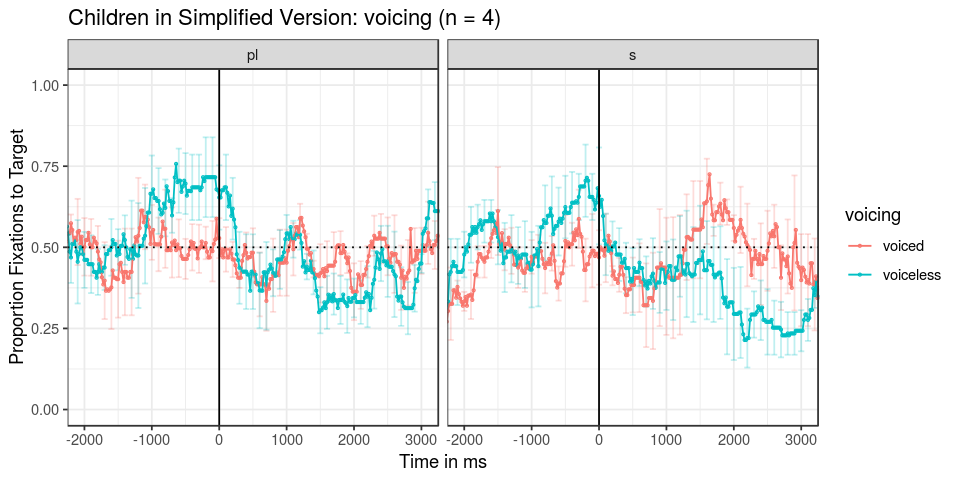

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”

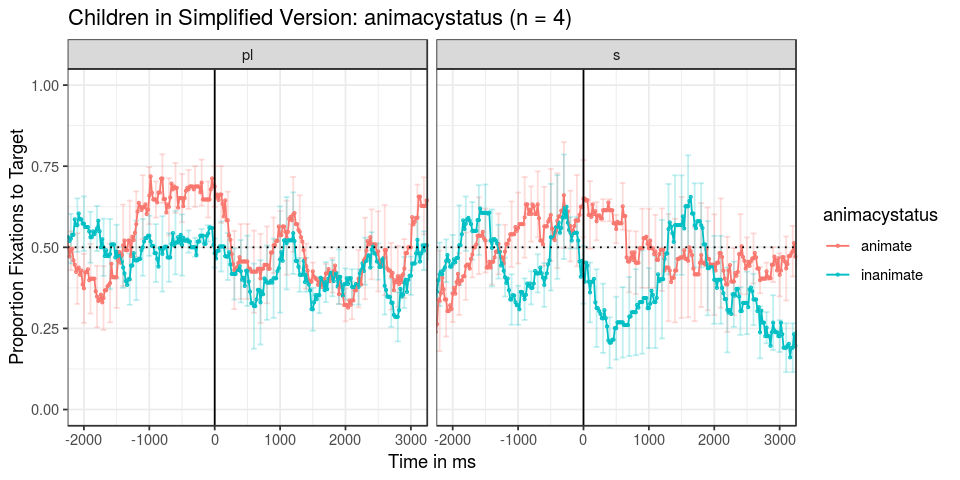

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

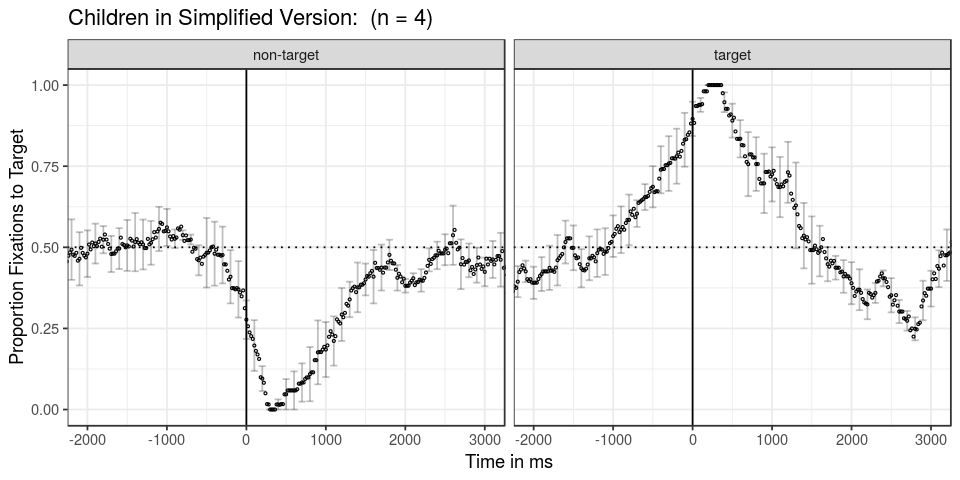

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"


Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

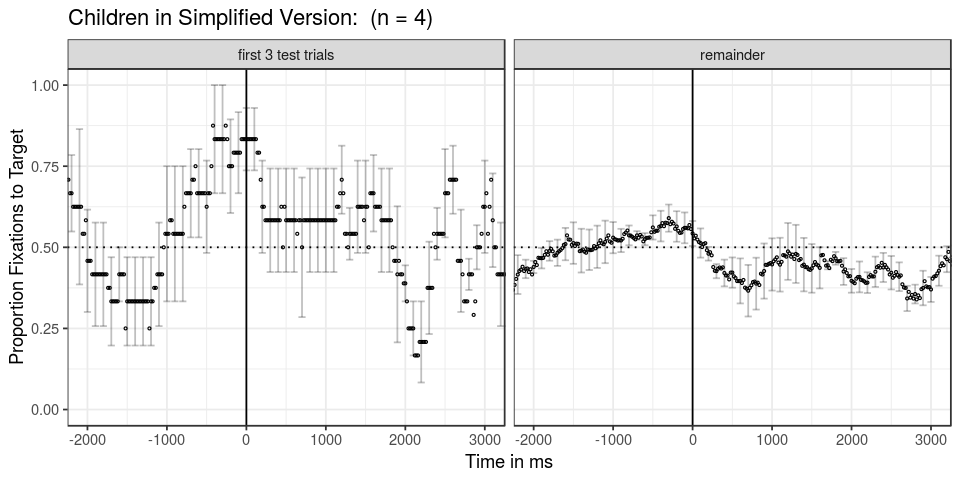

Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

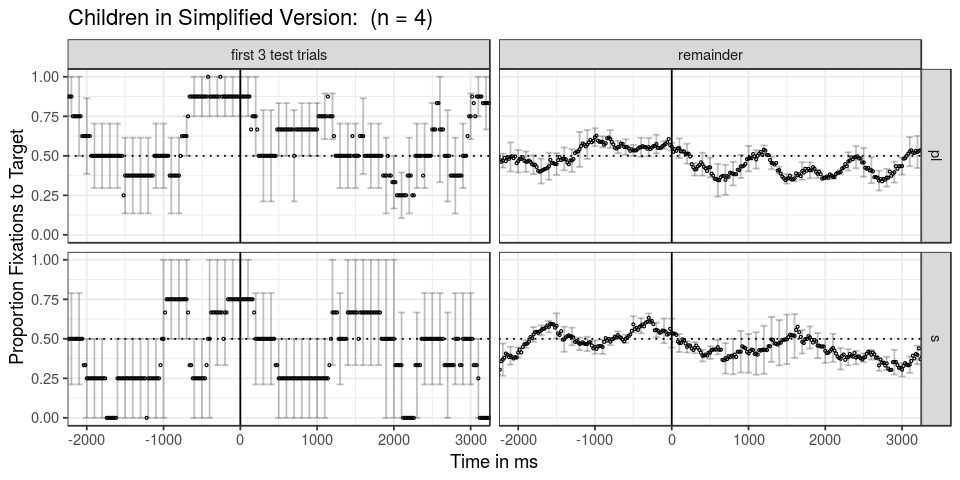

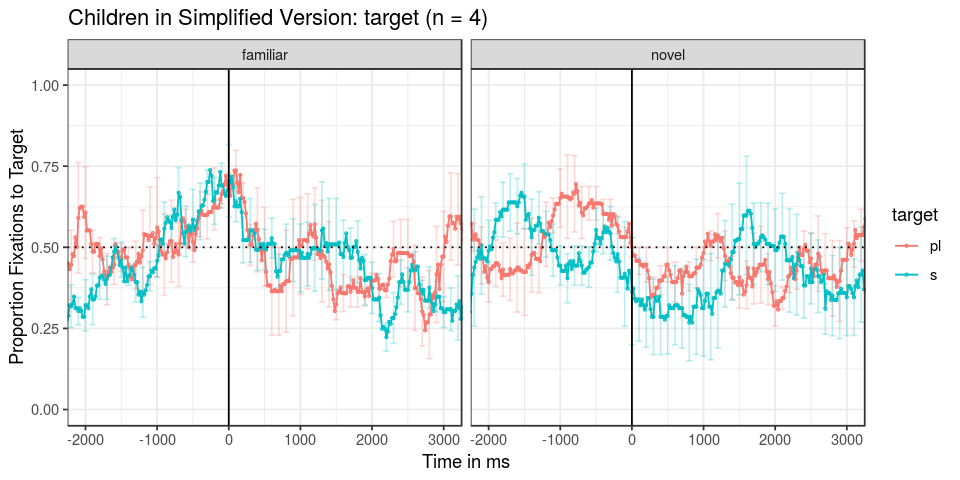

In [69]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'child' & expt_version == 'redblue'",
    mean_pp_duration = NULL, group_title = 'Children in Simplified Version')

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

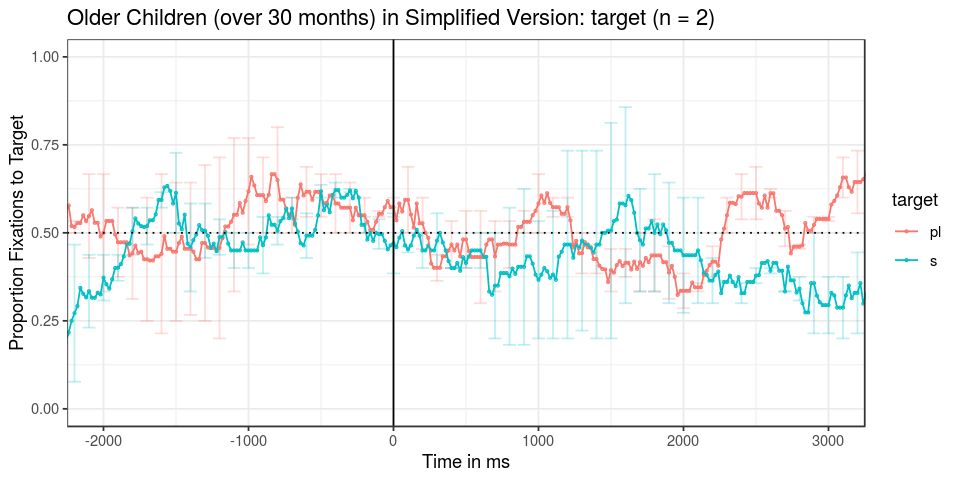

Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

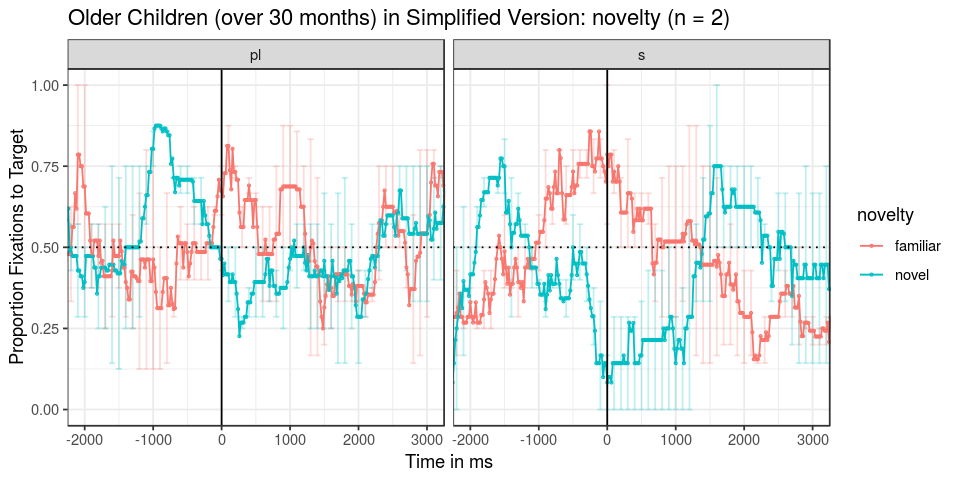

Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

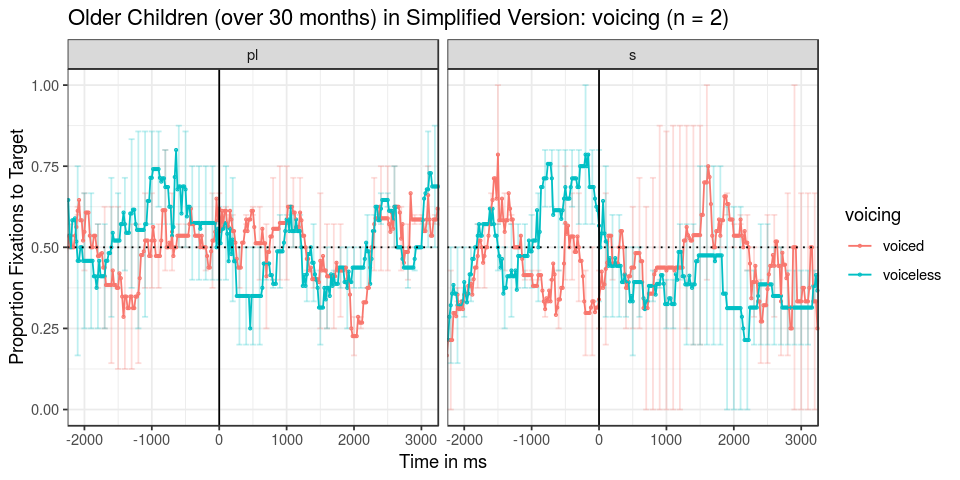

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

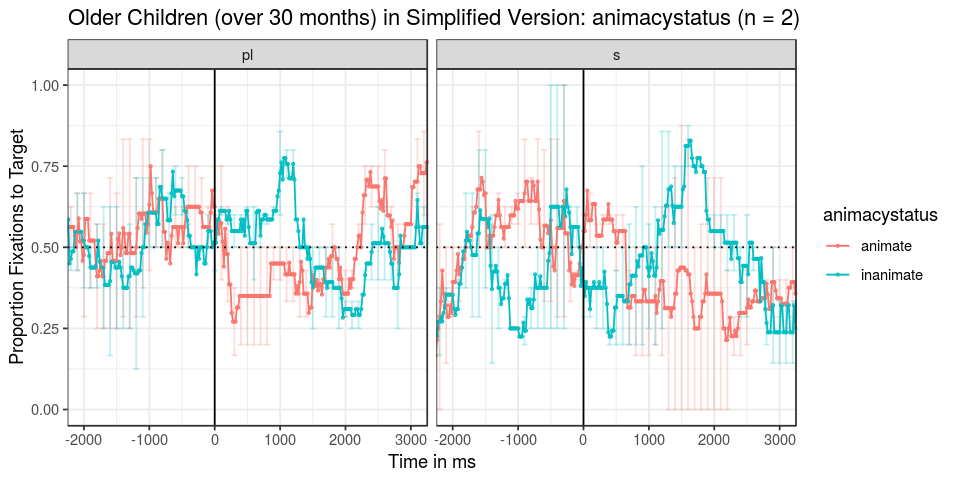

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

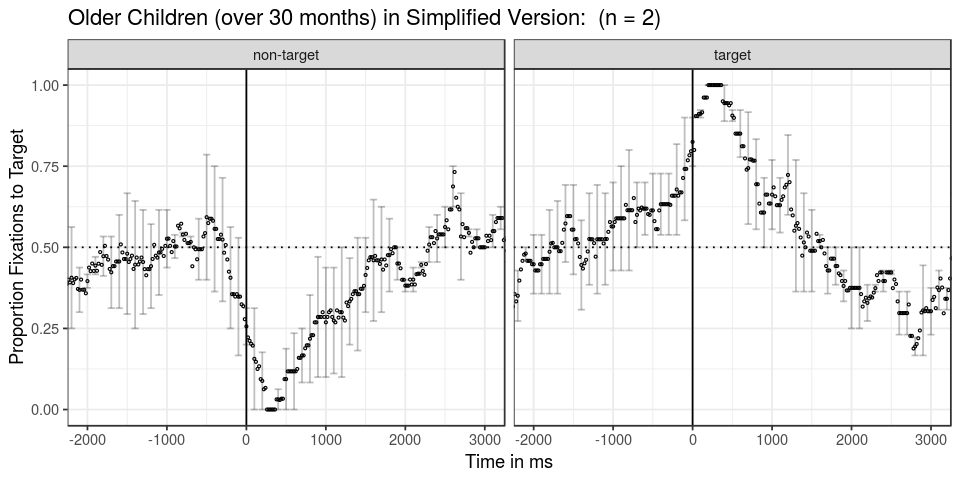

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"


Warning message:
“Removed 30 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

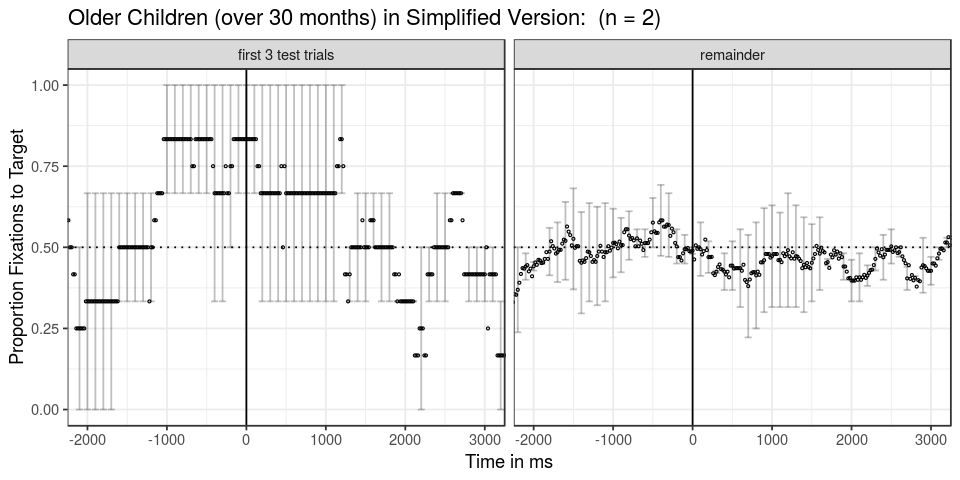

Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

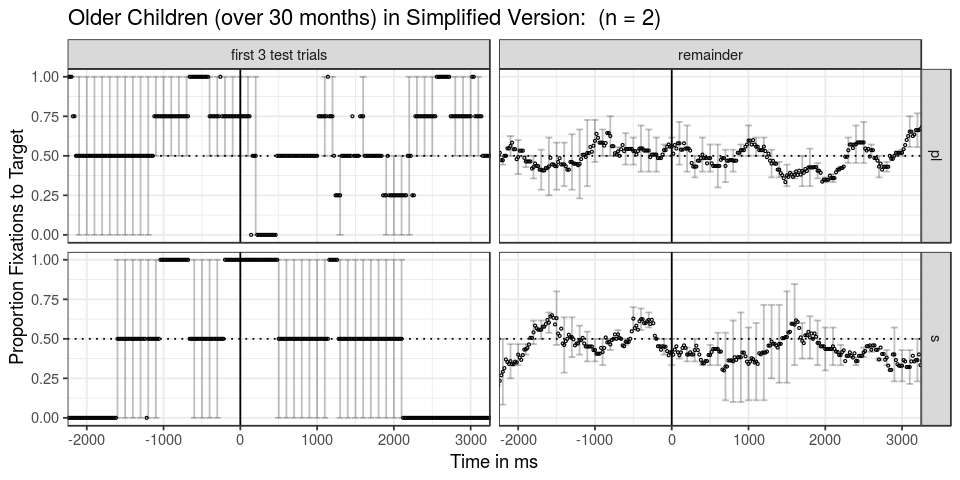

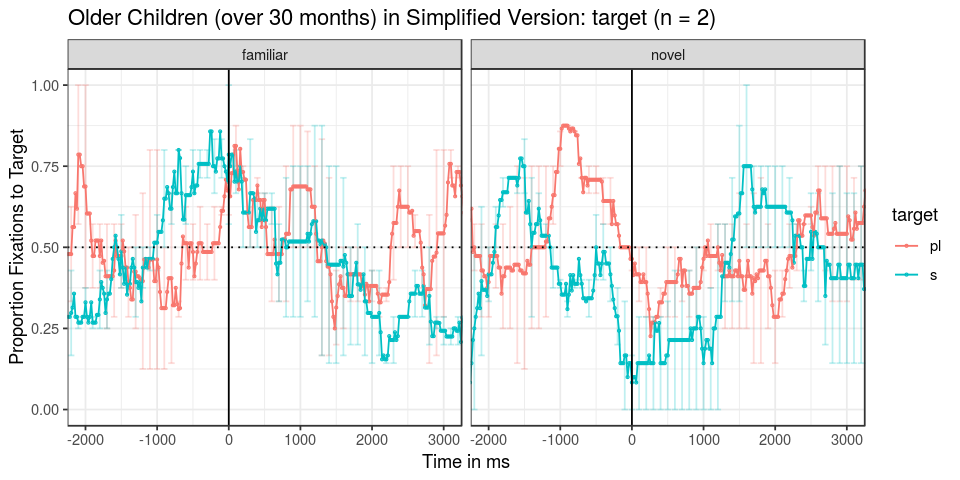

In [70]:
source('PLEARN_analysis_helper.R')
getGroupPlots(ed_df, filter_clause = "type == 'child' & age_in_days >= 915 & expt_version == 'redblue'",
    mean_pp_duration = NULL, group_title = 'Older Children (over 30 months) in Simplified Version')

# Comparison Between Experiments

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + expt_version + target"


Warning message:
“Ignoring unknown parameters: shape”

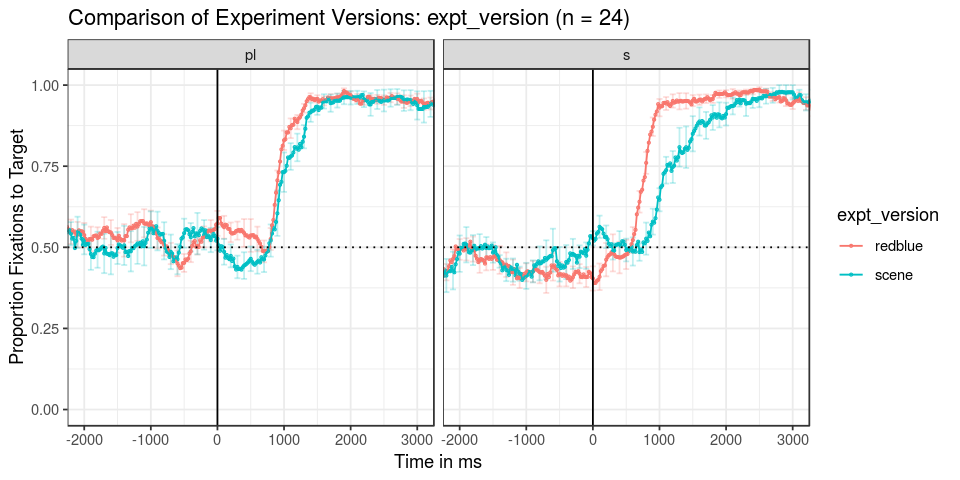

In [71]:
getGroupPlot(ed_df, 
        grouping_var = 'expt_version',
        filter_clause = "type == 'adult'",             
        facet_clause = '~ target',
        facet_type = 'wrap',
        loessSpan=.2, 
        x_start = -2000,
        x_end = 3000,
        mean_pp_duration= NULL,
        delay_ms= 367, 
        group_title = "Comparison of Experiment Versions")

[1] "facet clause:"
[1] "~ expt_version"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + expt_version"


Warning message:
“Ignoring unknown parameters: shape”

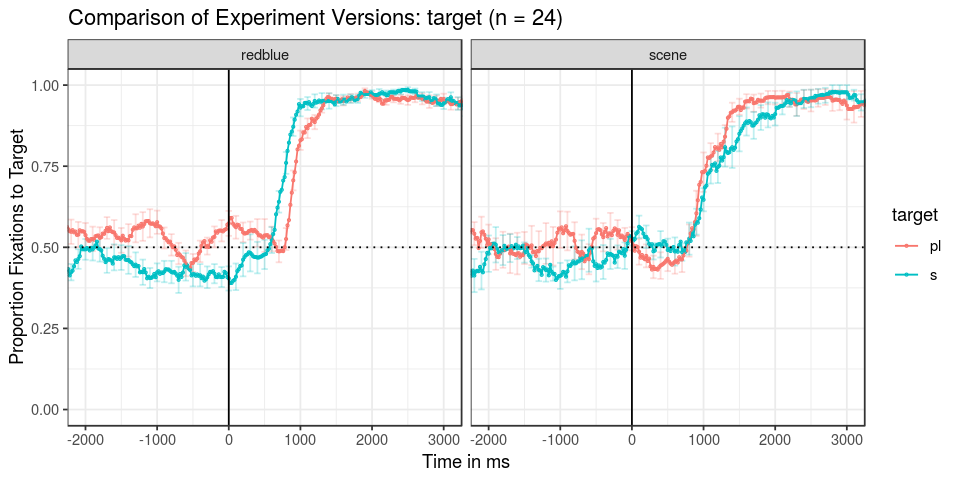

In [72]:
getGroupPlot(ed_df, 
        grouping_var = 'target',
        filter_clause = "type == 'adult'",             
        facet_clause = '~ expt_version',
        facet_type = 'wrap',
        loessSpan=.2, 
        x_start = -2000,
        x_end = 3000,
        mean_pp_duration= NULL,
        delay_ms= 367, 
        group_title = "Comparison of Experiment Versions")

# Participant Receptive Scores

In [ ]:
# [ ] Need to update the logic for yoked pair / difference scores

In [111]:
names(ed_df)

[1] "filename"                        "timeBin"                        
 [3] "FixationID"                      "CURRENT_FIX_START"              
 [5] "CURRENT_FIX_END"                 "TRIAL_INDEX"                    
 [7] "CURRENT_FIX_INDEX"               "RECORDING_SESSION_LABEL"        
 [9] "CURRENT_FIX_INTEREST_AREA_LABEL" "RT"                             
[11] "expt_index"                      "target"                         
[13] "s_form"                          "novelty"                        
[15] "animacystatus"                   "voicing"                        
[17] "practice"                        "Time"                           
[19] "Nonset"                          "participant_type"               
[21] "participant_name.x"              "label_at_onset"                 
[23] "time_to_last_nonna"              "track_loss_at_0"                
[25] "participant_name.y"              "id"                             
[27] "include"                         "age_in_days"                    
[29] "gender"                          "type"                           
[31] "expt_version"                    "comment"                        
[33] "age_in_months"                   "narrow_score"                   
[35] "broad_score"                     "first3"

In [112]:
source('PLEARN_analysis_helper.R')
by_participant = split(ed_df, ed_df$filename)
normalizeMethods = c('none','yoked','preceding')
all_scores = do.call('rbind', lapply(normalizeMethods, function(normalizeMethod){
    do.call('rbind', lapply(by_participant, function(fixbin_df){
        test_participant_receptive_knowledge(fixbin_df, normalizeMethod, end_analysis_window= 2500)
    }))    
}))

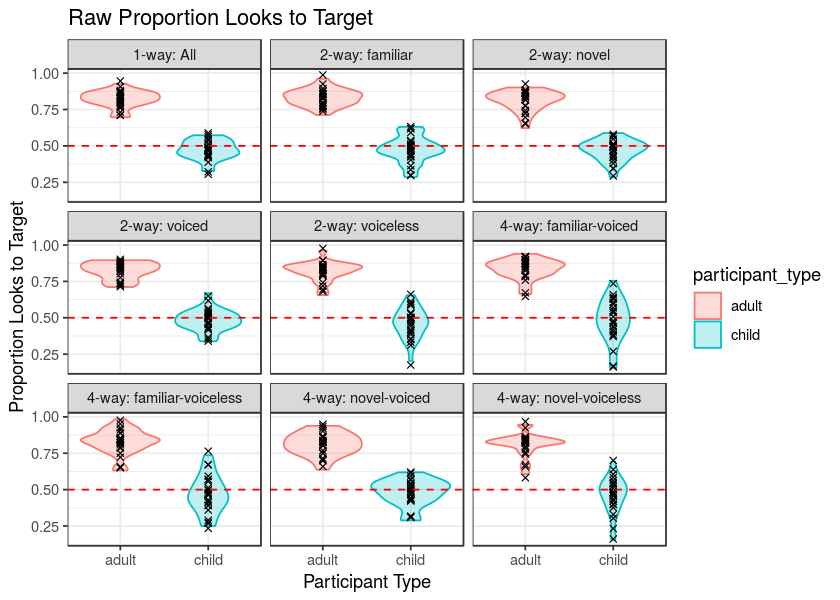

In [113]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(subset(all_scores, normalizeMethod == 'none')) + geom_violin(
aes(y=prop_looks_to_target, x = participant_type,
colour = participant_type, fill = participant_type), alpha=.25) +
geom_point(aes(x=participant_type, y=prop_looks_to_target), colour ='black',
shape = 4, position=position_jitter(height=.03, width=0)) + facet_wrap(
~partition_name) + theme_bw() + geom_hline(yintercept=.5, 
linetype = 'dashed', colour='red') + ggtitle('Raw Proportion Looks to Target'
) + xlab('Participant Type') + ylab('Proportion Looks to Target') 

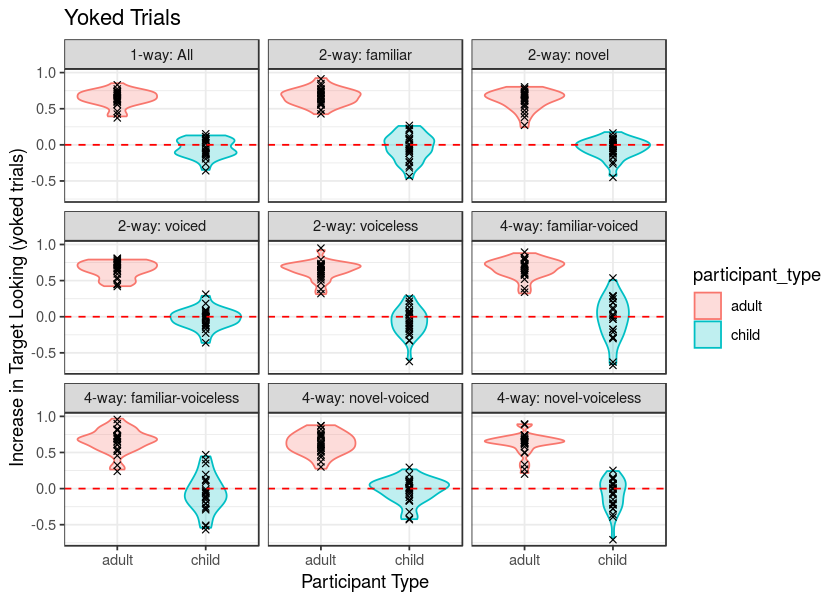

In [114]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(subset(all_scores, normalizeMethod == 'yoked')) + geom_violin(
aes(y=prop_looks_to_target, x = participant_type,
colour = participant_type, fill = participant_type), alpha=.25) +
geom_point(aes(x=participant_type, y=prop_looks_to_target), colour ='black',
shape = 4, position=position_jitter(height=.03, width=0)) + facet_wrap(
~partition_name) + theme_bw() + geom_hline(yintercept=0, 
linetype = 'dashed', colour='red') + ggtitle('Yoked Trials'
) + xlab('Participant Type') + ylab('Increase in Target Looking (yoked trials)') 

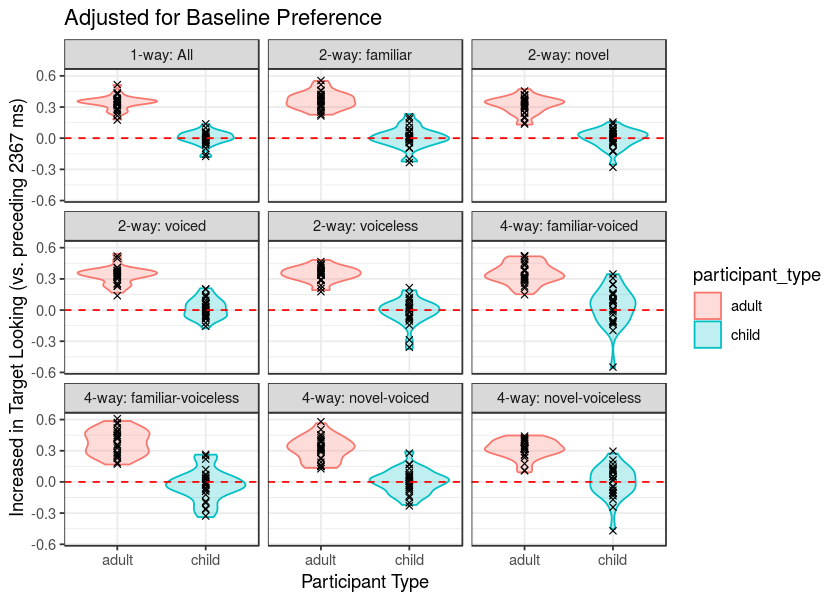

In [154]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(subset(all_scores, normalizeMethod == 'preceding')) + geom_violin(
aes(y=prop_looks_to_target, x = participant_type,
colour = participant_type, fill = participant_type), alpha=.25) +
geom_point(aes(x=participant_type, y=prop_looks_to_target), position=position_jitter(
height=.03, width=0), colour ='black', shape = 4) + facet_wrap(
~partition_name) + theme_bw() + geom_hline(yintercept=0, 
linetype = 'dashed', colour='red') + ggtitle('Adjusted for Baseline Preference'
) + xlab('Participant Type') + ylab('Increased in Target Looking (vs. preceding 2367 ms)') 

# Expressive Scores vs. Receptive Scores

In [119]:
subject_info[12,]

participant_name id   include filename           age_in_days gender type 
12 pl07             pl07 1       pl07_fixations.txt NA                 adult
   expt_version comment          age_in_months narrow_score broad_score
12 scene        eyetracking only NA            NA           NA

In [184]:
child_receptive_scores = subset(all_scores, normalizeMethod == 'yoked' & contrast_type == '1-way')
exre = merge(subject_info, child_receptive_scores, by='participant_name')
head(exre)

participant_name id        include filename                age_in_days gender
1 adultpl12        adultpl12 1       adultpl12_fixations.txt  NA               
2 adultpl13        adultpl13 1       adultpl13_fixations.txt  NA               
3 adultpl14        adultpl14 1       adultpl14_fixations.txt  NA               
4 adultpl15        adultpl15 1       adultpl15_fixations.txt  NA               
5 adultpl16        adultpl16 1       adultpl16_fixations.txt  NA               
6 pl00             pl00      1       pl00_fixations.txt      769         F     
  type  expt_version comment age_in_months narrow_score broad_score
1 adult scene                      NA      NA           NA         
2 adult scene                      NA      NA           NA         
3 adult scene                      NA      NA           NA         
4 adult scene                      NA      NA           NA         
5 adult scene                      NA      NA           NA         
6 child scene                25.21311      NA           NA         
  participant_type contrast_type prob         prop_looks_to_target
1 adult            1-way         9.650597e-06  0.60567613         
2 adult            1-way         2.983074e-01  0.46287695         
3 adult            1-way         5.699750e-01  0.39397740         
4 adult            1-way         2.505123e-02  0.63018958         
5 adult            1-way         1.076636e-01  0.56711393         
6 child            1-way         9.999435e-01 -0.05984286         
  thresholded                        partition_name normalizeMethod
1 Demonstrates RK! (p < .05)         1-way: All     yoked          
2 Unclear ( .05 < p < .33)           1-way: All     yoked          
3 Does not demonstrate RK! (p > .33) 1-way: All     yoked          
4 Demonstrates RK! (p < .05)         1-way: All     yoked          
5 Unclear ( .05 < p < .33)           1-way: All     yoked          
6 Does not demonstrate RK! (p > .33) 1-way: All     yoked

Warning message:
“Removed 17 rows containing missing values (geom_point).”

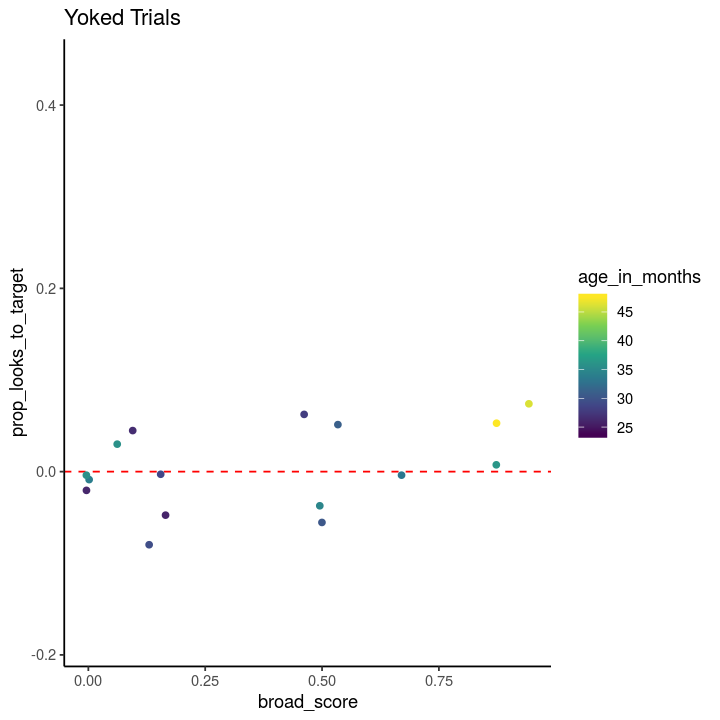

In [193]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(exre) + geom_hline(yintercept=0,  color = 'red', linetype = 'dashed') + geom_jitter(
aes(x=broad_score, y=prop_looks_to_target, colour=age_in_months)
) + scale_colour_continuous(type = "viridis") + theme_classic() + ggtitle('Yoked Trials')

In [188]:
child_receptive_scores = subset(all_scores, normalizeMethod == 'none' & contrast_type == '1-way')
exre = merge(subject_info, child_receptive_scores, by='participant_name')
head(exre)

participant_name id        include filename                age_in_days gender
1 adultpl12        adultpl12 1       adultpl12_fixations.txt  NA               
2 adultpl13        adultpl13 1       adultpl13_fixations.txt  NA               
3 adultpl14        adultpl14 1       adultpl14_fixations.txt  NA               
4 adultpl15        adultpl15 1       adultpl15_fixations.txt  NA               
5 adultpl16        adultpl16 1       adultpl16_fixations.txt  NA               
6 pl00             pl00      1       pl00_fixations.txt      769         F     
  type  expt_version comment age_in_months narrow_score broad_score
1 adult scene                      NA      NA           NA         
2 adult scene                      NA      NA           NA         
3 adult scene                      NA      NA           NA         
4 adult scene                      NA      NA           NA         
5 adult scene                      NA      NA           NA         
6 child scene                25.21311      NA           NA         
  participant_type contrast_type prob         prop_looks_to_target
1 adult            1-way         7.683411e-09 0.8028381           
2 adult            1-way         2.675264e-04 0.7314385           
3 adult            1-way         1.003080e-02 0.6969887           
4 adult            1-way         2.328306e-10 0.8150948           
5 adult            1-way         7.683411e-09 0.7835570           
6 child            1-way         7.016926e-01 0.4700786           
  thresholded                        partition_name normalizeMethod
1 Demonstrates RK! (p < .05)         1-way: All     none           
2 Demonstrates RK! (p < .05)         1-way: All     none           
3 Demonstrates RK! (p < .05)         1-way: All     none           
4 Demonstrates RK! (p < .05)         1-way: All     none           
5 Demonstrates RK! (p < .05)         1-way: All     none           
6 Does not demonstrate RK! (p > .33) 1-way: All     none

Warning message:
“Removed 17 rows containing missing values (geom_point).”

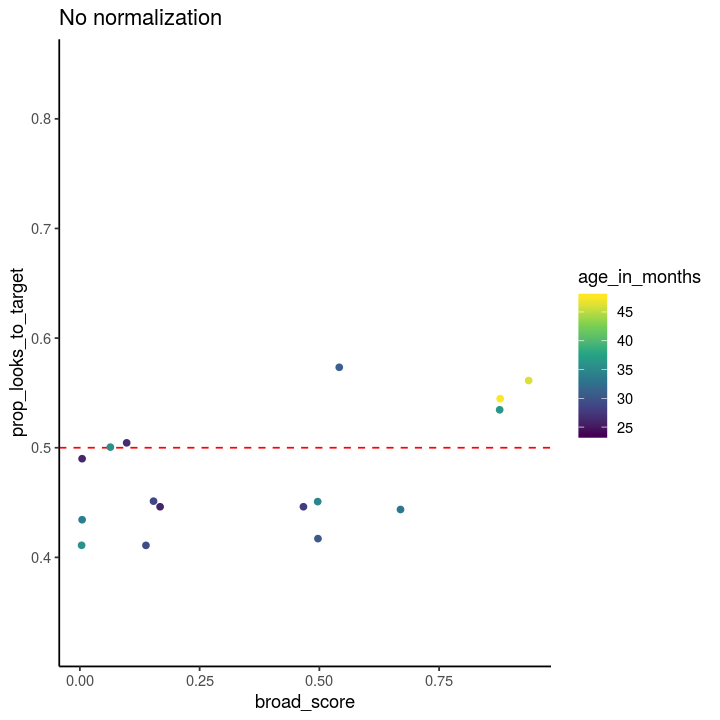

In [189]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(exre) + geom_hline(yintercept=.5,  color = 'red', linetype = 'dashed') + geom_jitter(
aes(x=broad_score, y=prop_looks_to_target, colour=age_in_months)
) + scale_colour_continuous(type = "viridis") + theme_classic() + ggtitle('No normalization')

In [190]:
child_receptive_scores = subset(all_scores, normalizeMethod == 'preceding' & contrast_type == '1-way')
exre = merge(subject_info, child_receptive_scores, by='participant_name')
head(exre)

participant_name id        include filename                age_in_days gender
1 adultpl12        adultpl12 1       adultpl12_fixations.txt  NA               
2 adultpl13        adultpl13 1       adultpl13_fixations.txt  NA               
3 adultpl14        adultpl14 1       adultpl14_fixations.txt  NA               
4 adultpl15        adultpl15 1       adultpl15_fixations.txt  NA               
5 adultpl16        adultpl16 1       adultpl16_fixations.txt  NA               
6 pl00             pl00      1       pl00_fixations.txt      769         F     
  type  expt_version comment age_in_months narrow_score broad_score
1 adult scene                      NA      NA           NA         
2 adult scene                      NA      NA           NA         
3 adult scene                      NA      NA           NA         
4 adult scene                      NA      NA           NA         
5 adult scene                      NA      NA           NA         
6 child scene                25.21311      NA           NA         
  participant_type contrast_type prob      prop_looks_to_target
1 adult            1-way         0.8923364 0.36594459          
2 adult            1-way         0.9999435 0.23076116          
3 adult            1-way         0.9999903 0.28542984          
4 adult            1-way         0.9899692 0.33582305          
5 adult            1-way         0.9999903 0.25756008          
6 child            1-way         0.9999435 0.04132156          
  thresholded                        partition_name normalizeMethod
1 Does not demonstrate RK! (p > .33) 1-way: All     preceding      
2 Does not demonstrate RK! (p > .33) 1-way: All     preceding      
3 Does not demonstrate RK! (p > .33) 1-way: All     preceding      
4 Does not demonstrate RK! (p > .33) 1-way: All     preceding      
5 Does not demonstrate RK! (p > .33) 1-way: All     preceding      
6 Does not demonstrate RK! (p > .33) 1-way: All     preceding

Warning message:
“Removed 17 rows containing missing values (geom_point).”

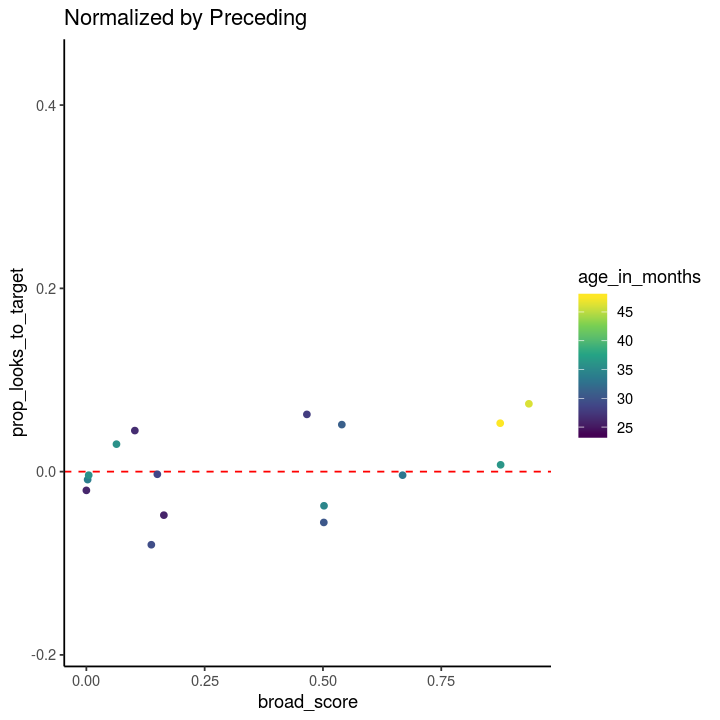

In [192]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(exre) + geom_hline(yintercept=0,  color = 'red', linetype = 'dashed') + geom_jitter(
aes(x=broad_score, y=prop_looks_to_target, colour=age_in_months)
) + scale_colour_continuous(type = "viridis") + theme_classic() + ggtitle('Normalized by Preceding')

# Logistic Regression Models for Production

In [82]:
library('lme4')

In [83]:
p_coded$s_success = NA 
p_coded$s_success[p_coded$Singular.Code %in% c(5)] = 1
p_coded$s_success[p_coded$Singular.Code %in% seq(1,4)] = 0
p_coded$pl_success = NA 
p_coded$pl_success[p_coded$Plural.Code %in% c(7,8)] = 1
p_coded$pl_success[p_coded$Plural.Code %in% seq(1,6)] = 0

In [84]:
subset(p_coded, pl_success == T)

Lemma  child itemId Singular.IPA                               
1   ant    pl20  10     ant                                        
2   ant    pl14  10     ant                                        
5   ant    pl16  10     I don't know what they ant                 
7   ant    pl22  10     ant                                        
8   boat   pl20  6      0                                          
11  boat   pl10  6      boat splish splash                         
12  boat   pl24  6      it supposed to be in the water, boat       
14  boat   pl22  6      boat                                       
16  bug    pl14  1      no….bug                                    
21  bug    pl22  1      buug                                       
22  cat    pl13  16     cat                                        
25  cat    pl15  16     cat                                        
31  cat    pl27  16     cat                                        
32  cat    pl17  16     cat                                        
40  cow    pl17  14     cow                                        
42  cow    pl19  14     cow                                        
45  cow    pl15  14     caow                                       
53  cup    pl27  11     sippy cup                                  
57  cup    pl13  11     cu                                         
58  cup    pl19  11     cup                                        
59  cup    pl23  11     cup                                        
63  deg    pl16  3      it's too (agrees to hard)                  
73  duck   pl22  13     duck                                       
76  dup    pl14  12     dup                                        
78  dup    pl22  12     dup                                        
79  dup    pl16  12     I don't know what the dup                  
82  egg    pl16  16     e(gh)                                      
85  egg    pl20  16     a egg                                      
87  egg    pl22  16     egg                                        
89  fip    pl27  6      fip                                        
⋮   ⋮      ⋮     ⋮      ⋮                                          
233 pog    pl17  1      pog                                        
240 pog    pl27  1      pog                                        
243 rabbit pl19  2      rabbit                                     
250 rabbit pl13  2      rabbit                                     
252 rabbit pl17  2      ribbit                                     
253 rabbit pl04  2      rabbit                                     
254 rabbit pl27  2      rabbit                                     
255 spoon  pl20  14     soon                                       
256 spoon  pl14  14     soons                                      
260 spoon  pl16  14     a poon. Poon. No no I can turn the pictures
261 spoon  pl22  14     spoon                                      
263 star   pl13  4      star                                       
264 star   pl01  4      ya, star, twinkle twinkle                  
265 star   pl17  4      sar                                        
267 star   pl27  4      staaar                                     
270 star   pl19  4      tar                                        
273 star   pl03  4      tar                                        
275 teb    pl20  8      teb…. Blue, rd, yellow, green              
278 teb    pl14  8      te ba                                      
280 teb    pl22  8      teb                                        
281 teb    pl16  8      no...I don't know… on one                  
285 tep    pl27  5      tep                                        
286 tep    pl17  5      tep                                        
294 tep    pl13  5      tep                                        
297 tig    pl23  13     tig                                        
301 tig    pl13  13     tig                                        
312 truck  pl27  8      truck                               

## Singular Production

In [85]:
table(p_coded$s_success)


  0   1 
 66 240 

In [86]:
library('optimx')

In [87]:
lm = glmer(s_success~novelty+ voicing + animacyStatus + 
    (novelty + voicing + animacyStatus |child) +(1|itemId), family=binomial, data=p_coded,
 control = glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=100000)))
summary(lm)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: s_success ~ novelty + voicing + animacyStatus + (novelty + voicing +  
    animacyStatus | child) + (1 | itemId)
   Data: p_coded
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
   235.8    291.7   -102.9    205.8      291 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1872  0.0490  0.1441  0.2865  2.5895 

Random effects:
 Groups Name                   Variance Std.Dev. Corr             
 child  (Intercept)            5.3423   2.311                     
        noveltynovel           1.3357   1.156    -0.22            
        voicingvoiceless       1.1780   1.085     0.65 -0.11      
        animacyStatusinanimate 0.4212   0.649     0.53  0.34  0.90
 itemId (Intercept)            0.0000   0.000                     
Number of obs: 306, groups:  child, 20; itemId, 

## Plural Production

In [88]:
table(subset(p_coded, Singular.Code ==5)$pl_success)


  0   1 
142  95 

In [89]:
lm = glmer(pl_success~novelty+ voicing + animacyStatus + 
    (novelty+ voicing + animacyStatus|child) +(1|itemId), family=binomial, 
    data=subset(p_coded, Singular.Code ==5),
 control = glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=100000)))

In [90]:
summary(lm)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: pl_success ~ novelty + voicing + animacyStatus + (novelty + voicing +  
    animacyStatus | child) + (1 | itemId)
   Data: subset(p_coded, Singular.Code == 5)
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
   266.0    318.1   -118.0    236.0      222 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7224 -0.4956 -0.1644  0.4877  2.3454 

Random effects:
 Groups Name                   Variance Std.Dev. Corr          
 child  (Intercept)            1.2191   1.1041                 
        noveltynovel           1.6924   1.3009   0.95          
        voicingvoiceless       0.2530   0.5030   1.00 0.97     
        animacyStatusinanimate 0.7404   0.8605   0.77 0.53 0.73
 itemId (Intercept)            0.0000   0.0000                 
Number of obs: 237, groups:  child, 1

# Age vs. Plural Knowledge

In [91]:
code_counts_with_age = merge(subject_info, code_counts, by.x='id', by.y='child')
code_counts_with_age = merge(code_counts_with_age, codes)
head(code_counts_with_age)

code description id   participant_name include filename           
1 0    No data (0) pl18 pl18             1       pl18_fixations.xlsx
2 0    No data (0) pl24 pl24             1       pl24_fixations.xlsx
3 0    No data (0) pl20 pl20             1       pl20_fixations.xlsx
4 0    No data (0) pl18 pl18             1       pl18_fixations.xlsx
5 0    No data (0) pl01 pl01             1       pl01_fixations.txt 
6 0    No data (0) pl01 pl01             1       pl01_fixations.txt 
  age_in_days gender type  expt_version comment age_in_months narrow_score
1 1034        F      child scene                33.90164      NaN         
2 1091        M      child scene                35.77049        1         
3 1008        F      child scene                33.04918        1         
4 1034        F      child scene                33.90164      NaN         
5  788        F      child scene                25.83607        1         
6  788        F      child scene                25.83607        1         
  broad_score count s_pl    
1 0.00000000  3     plural  
2 0.06666667  1     singular
3 0.66666667  5     singular
4 0.00000000  4     singular
5 0.16666667  1     singular
6 0.16666667  2     plural

In [92]:
subset(code_counts_with_age, age_in_months > 35 & age_in_months < 38)

code description                              id   participant_name include
2   0    No data (0)                              pl24 pl24             1      
44  3    Other word (not noun) (3)                pl27 pl27             1      
45  3    Other word (not noun) (3)                pl25 pl25             1      
55  5    Singular form (5)                        pl24 pl24             1      
56  5    Singular form (5)                        pl25 pl25             1      
65  5    Singular form (5)                        pl24 pl24             1      
71  5    Singular form (5)                        pl27 pl27             1      
78  5    Singular form (5)                        pl27 pl27             1      
82  5    Singular form (5)                        pl25 pl25             1      
101 8    Plural form, adult-like articulation (8) pl24 pl24             1      
102 8    Plural form, adult-like articulation (8) pl27 pl27             1      
    filename            age_in_days gender type  expt_version comment
2   pl24_fixations.xlsx 1091        M      child scene               
44  pl27_fixations.xlsx 1107        F      child scene               
45  pl25_fixations.xlsx 1091        M      child scene               
55  pl24_fixations.xlsx 1091        M      child scene               
56  pl25_fixations.xlsx 1091        M      child scene               
65  pl24_fixations.xlsx 1091        M      child scene               
71  pl27_fixations.xlsx 1107        F      child scene               
78  pl27_fixations.xlsx 1107        F      child scene               
82  pl25_fixations.xlsx 1091        M      child scene               
101 pl24_fixations.xlsx 1091        M      child scene               
102 pl27_fixations.xlsx 1107        F      child scene               
    age_in_months narrow_score broad_score count s_pl    
2   35.77049        1          0.06666667   1    singular
44  36.29508        1          0.87500000   1    plural  
45  35.77049      NaN          0.00000000   1    plural  
55  35.77049        1          0.06666667  15    plural  
56  35.77049      NaN          0.00000000  16    singular
65  35.77049        1          0.06666667  15    singular
71  36.29508        1          0.87500000   1    plural  
78  36.29508        1          0.87500000  16    singular
82  35.77049      NaN          0.00000000  15    plural  
101 35.77049        1          0.06666667   1    plural  
102 36.29508        1          0.87500000  14    plural

Warning message:
“position_stack requires non-overlapping x intervals”Warning message:
“position_stack requires non-overlapping x intervals”

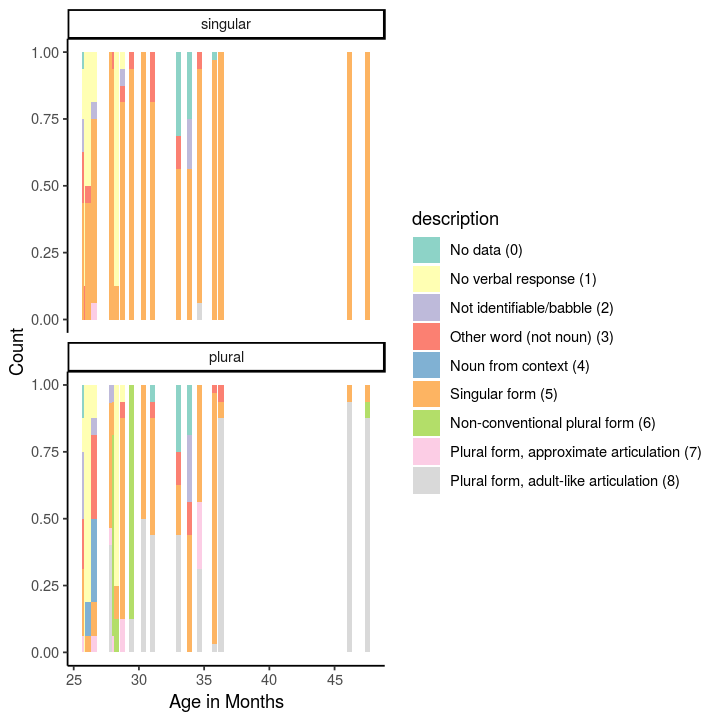

In [93]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(code_counts_with_age) + geom_bar(aes(x=age_in_months, y=count, fill=description),
stat="identity",  width = 0.4, position="fill") + scale_fill_brewer(palette="Set3"
) + facet_wrap(~s_pl, nrow=2) + xlab('Age in Months') + ylab('Count'
) + theme_classic() 

Compare with existing studies: 

- Zapf and Smith (2007):
- Zapf and Ettlinger (2011): for 22-35 months (m=25.8): 52% correct plurals; 33% singulars, remainder are non-answers
Experimenter says "Can you tell Teddy to get ____" and point to the singulars or the plurals. Common familiar nouns. ****Teddy bear picks up things or not, i.e. there is reinforcement learning.****


# Vocabulary vs. Plural Knowledge

In [ ]:
# pull in CDI scores

# Response Time When Looking at Distractor

In [178]:
metadata_cols = c('animacystatus', 'background_context','distractorimage',
'distractorloc', 'expt_index', 'full_carrier', 'novel_id', 'novelcolor',
'novelty', 'order', 'pl_carrier', 'pl_form', 'pl_punct', 'pl_sentence',
'pl_wav_index', 'practice', 's_carrier', 's_form', 's_punct',
's_sentence', 's_wav_index', 'simple_pl_stim', 'simple_s_stim', 'target',
'targetimage', 'targetloc', 'targetside', 'test_index', 'trial', 'voicing', 'vowel_carrier',
'RECORDING_SESSION_LABEL')

In [179]:
names(ed_df)

[1] "filename"                        "timeBin"                        
 [3] "FixationID"                      "CURRENT_FIX_START"              
 [5] "CURRENT_FIX_END"                 "TRIAL_INDEX"                    
 [7] "CURRENT_FIX_INDEX"               "RECORDING_SESSION_LABEL"        
 [9] "CURRENT_FIX_INTEREST_AREA_LABEL" "RT"                             
[11] "expt_index"                      "target"                         
[13] "s_form"                          "novelty"                        
[15] "animacystatus"                   "voicing"                        
[17] "practice"                        "Time"                           
[19] "Nonset"                          "participant_type"               
[21] "participant_name.x"              "label_at_onset"                 
[23] "time_to_last_nonna"              "track_loss_at_0"                
[25] "participant_name.y"              "id"                             
[27] "include"                         "age_in_days"                    
[29] "gender"                          "type"                           
[31] "expt_version"                    "comment"                        
[33] "age_in_months"                   "narrow_score"                   
[35] "broad_score"                     "first3"

In [180]:
fixreports = split(ed_df, ed_df$filename)

In [97]:
source('PLEARN_analysis_helper.R')
test_df = do.call('rbind',lapply(fixreports, function(fixreport){
    getParticipantRTs(380, fixreport, label_colname="CURRENT_FIX_INTEREST_AREA_LABEL", metadata_cols, include_non_roi_label=T)
})) 

ERROR: Error in if (last_fix[[label_colname]] == ".") {: missing value where TRUE/FALSE needed


In [ ]:
# 10/10/19: this is failing because of an edge case where we don't see any fixations before disambiguation

In [ ]:
getRTComparisonPlot = function(test_df, split_var, facet_var = NULL){
    
    agg_equation = paste("rt ~", split_var)
    if (!is.null(facet_var)){
        agg_equation = paste(agg_equation, "+", facet_var)
    }
    summary_df = do.call(data.frame, aggregate(as.formula(agg_equation), data = test_df, FUN = function(x)
        c(mean = mean(x), sd = sd(x))))
    print(names(summary_df))                   
    
    options(repr.plot.width=4, repr.plot.height=4)
    p1 = ggplot(test_df) + geom_violin(mapping=aes(y=rt, x=factor(test_df[[split_var
]]), colour=factor(test_df[[split_var]]))) + theme_bw(
) + geom_errorbar(data = summary_df, mapping=aes(x=factor(summary_df[[split_var
]]), ymin =  rt.mean - rt.sd, ymax = rt.mean + rt.sd), width = 0.1, alpha=.5) + geom_errorbar(data = summary_df, mapping=aes(x=factor(summary_df[[split_var
]]), ymin =  rt.mean, ymax = rt.mean)) + theme_bw(
) + geom_hline(yintercept=0, colour='black', linetype='dashed'
) + geom_hline(yintercept=367, colour='forestgreen') + coord_flip(
ylim= c(0,2000)) + xlab(split_var) + ylab(''
) + theme(legend.position="none")
    
    if (!is.null(facet_var)){
        options(repr.plot.width=4, repr.plot.height=8)
        p1 = p1 + facet_wrap(as.formula(paste('~', facet_var, sep='')), ncol=1)
    }
    print(p1)
                                               
    p2 = ggplot(test_df) + geom_histogram(mapping=aes(x=rt, fill=factor(test_df[[split_var]]))
    ) + theme_bw() + geom_errorbarh(data = summary_df, 
    mapping=aes(y=factor(summary_df[[split_var]]), xmin =  rt.mean - rt.sd, xmax = rt.mean + rt.sd),
    width = 0.1, alpha=.5) + geom_errorbarh(data = summary_df, mapping=aes(y=factor(summary_df[[split_var
    ]]), xmin =  rt.mean, xmax = rt.mean)) + theme_bw() + geom_vline(xintercept=0, 
    colour='black', linetype='dashed') + geom_vline(xintercept=367, colour='forestgreen'
    ) + coord_cartesian(xlim= c(0,2000)) + theme(legend.position="none")
    
    if (!is.null(facet_var)){
        options(repr.plot.width=4, repr.plot.height=8)
        p2 = p2 + facet_wrap(as.formula(paste('~', facet_var, '+', split_var, sep='')), ncol=1)
    } else {
        p2 = p2 + facet_wrap(as.formula(paste('~', split_var, sep='')), ncol=1)
    }
    #print(p2)                                  
                                               
                                               
}

In [ ]:
names(test_df)

In [ ]:
getRTComparisonPlot(test_df, split_var = 'RECORDING_SESSION_LABEL', facet_var='target')

In [ ]:
getRTComparisonPlot(test_df, split_var = 'target')

In [ ]:
getRTComparisonPlot(test_df, split_var = 'target', facet_var = 'RECORDING_SESSION_LABEL')

In [ ]:
getRTComparisonPlot(test_df,split_var = 'voicing', facet_var='target')

In [ ]:
getRTComparisonPlot(test_df,split_var = 'novelty', facet_var='target')

In [ ]:
getRTComparisonPlot(test_df,split_var = 'animacystatus', facet_var='target')

In [ ]:
names(test_df)

In [ ]:
library('lme4')
lm = lmer(rt ~ novelty + voicing + animacystatus + 
    (novelty + voicing + animacystatus | RECORDING_SESSION_LABEL) +(1|s_form), data=
 test_df, )
summary(lm)

# Preference Before Disambiguation

In [194]:
ed_df$participant_name = ed_df$participant_name.x

In [195]:
beforeafter_disambig_df = subset(ed_df, 
    CURRENT_FIX_INTEREST_AREA_LABEL %in% c('TARGET','DISTRACTOR')) 
beforeafter_disambig_df$looking_at_plural = 0
beforeafter_disambig_df$looking_at_plural[
    beforeafter_disambig_df$CURRENT_FIX_INTEREST_AREA_LABEL == 'TARGET' & 
    beforeafter_disambig_df$target == 'pl'] = 1
beforeafter_disambig_df$looking_at_plural[
    beforeafter_disambig_df$CURRENT_FIX_INTEREST_AREA_LABEL == 'DISTRACTOR' & 
    beforeafter_disambig_df$target == 's'] = 1
beforeafter_disambig_df$beforeafter = 'After Disambiguation'
beforeafter_disambig_df$beforeafter[beforeafter_disambig_df$Time < 367] = 'Before Disambiguation'
beforeafter_disambig_preference = aggregate(looking_at_plural ~ participant_name +
    type + beforeafter + TRIAL_INDEX, 
    beforeafter_disambig_df, mean)

beforeafter_disambig_by_subject = do.call(data.frame, aggregate(looking_at_plural ~ participant_name + type +  beforeafter, beforeafter_disambig_preference, FUN = function(x){c(mean=mean(x), sd = sd(x))}))                                       

print(beforeafter_disambig_by_subject)

            participant_name  type           beforeafter looking_at_plural.mean
1        adultpl12_fixations adult  After Disambiguation              0.5042678
2        adultpl13_fixations adult  After Disambiguation              0.5158088
3        adultpl14_fixations adult  After Disambiguation              0.5038737
4        adultpl15_fixations adult  After Disambiguation              0.4857293
5        adultpl16_fixations adult  After Disambiguation              0.4912726
6             pl06_fixations adult  After Disambiguation              0.5088005
7             pl07_fixations adult  After Disambiguation              0.4915883
8             pl08_fixations adult  After Disambiguation              0.5117331
9  plearn_adults_plad01.xlsx adult  After Disambiguation              0.4974054
10 plearn_adults_plad02.xlsx adult  After Disambiguation              0.4854233
11 plearn_adults_plad03.xlsx adult  After Disambiguation              0.4978965
12 plearn_adults_plad04.xlsx adult  Afte

In [196]:
beforeafter_disambig_by_subject$looking_at_plural_low = 
    beforeafter_disambig_by_subject$looking_at_plural.mean - beforeafter_disambig_by_subject$looking_at_plural.sd
beforeafter_disambig_by_subject$looking_at_plural_high = 
    beforeafter_disambig_by_subject$looking_at_plural.mean + beforeafter_disambig_by_subject$looking_at_plural.sd

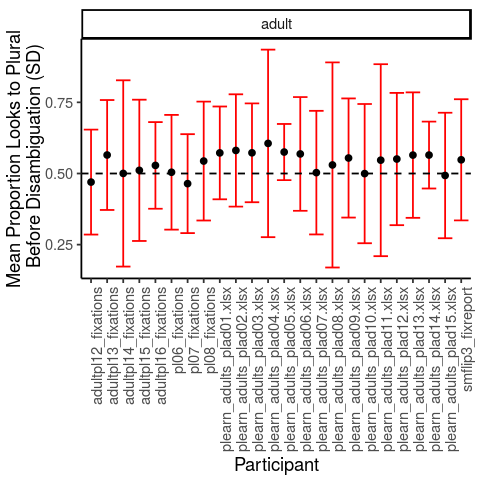

In [197]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(subset(beforeafter_disambig_by_subject, beforeafter == "Before Disambiguation" &
type == 'adult')) + geom_errorbar(aes(x=participant_name, ymin= looking_at_plural_low,
 ymax= looking_at_plural_high), color='red') + geom_point(aes(x=participant_name, 
y=looking_at_plural.mean)) + theme_classic() + geom_hline(yintercept=.5, linetype = 'dashed'
) + xlab('Participant') + ylab('Mean Proportion Looks to Plural\n Before Disambiguation (SD)'
) + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + facet_wrap(~type)


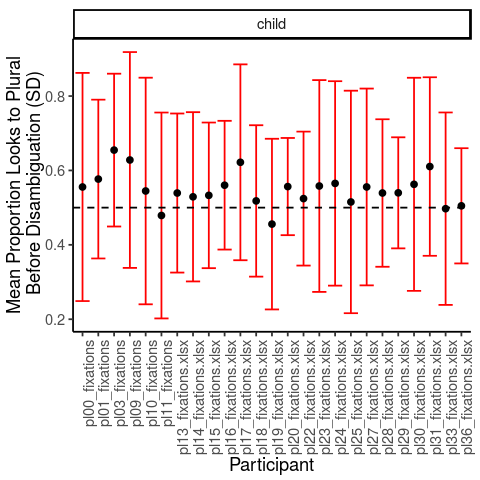

In [198]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(subset(beforeafter_disambig_by_subject, beforeafter == "Before Disambiguation" &
type == 'child')) + geom_errorbar(aes(x=participant_name, ymin= looking_at_plural_low,
 ymax= looking_at_plural_high), color='red') + geom_point(aes(x=participant_name, 
y=looking_at_plural.mean)) + theme_classic() + geom_hline(yintercept=.5, linetype = 'dashed'
) + xlab('Participant') + ylab('Mean Proportion Looks to Plural\n Before Disambiguation (SD)'
) + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + facet_wrap(~type)



In [ ]:
# should the last fix before disambig be excluded
#[X] Confirm that 0 is the point of disambig for everyone
#[X] propagate the information about the trials
#[X] Make sure that my ordering is doing the right thing
#[X] how to account for the 200 ms exclusion
#[X] have a bit of a buffer on either side of 0 in case there’s an NA instead of a 0/1 in that exact timebin
#    -- so far this is just looking backwards
#[ ] need to recompute wrt the beginning of the /s/ or /z/ segment, not the end

# Experimental Visualizations + Analyses 

## Binomial Test for Receptive Knowledge

In [ ]:
# requires updating since refactoring

In [ ]:
pl06_fixbins$is_looking_at_target  = as.numeric(pl06_fixbins$CURRENT_FIX_INTEREST_AREA_LABEL == 'TARGET')

In [ ]:
rlist = getPlotForMethod(fixbin_dfs, adult_fixbin_dfs, 'none')
options(repr.plot.width=10, repr.plot.height=5)
print(rlist$p1)
ggsave('figures/binomialTest_nopreprocessing.pdf', width=20, height=10)

In [ ]:
print(rlist$p2)

False negative rate around .1 on 2-way contrasts when halfway between adult-like knowledge and zero knowledge

False positve rate of around .02 on 1-way contrasts when zero-knowledge

In [ ]:
# takes a long time to run because of the bootstrapping
sim_yoked = getPlotForMethod(fixbin_dfs,adult_fixbin_dfs, 'yoked')
options(repr.plot.width=10, repr.plot.height=5)
print(sim_yoked$p1)
ggsave('figures/binomialTest_yoked.pdf', width=20, height=10)

In [ ]:
sim_yoked$p2

In [ ]:
# takes a long time to run because of the bootstrapping
sim_preceding = getPlotForMethod(fixbin_dfs,adult_fixbin_dfs, 'preceding')
options(repr.plot.width=10, repr.plot.height=5)
print(sim_preceding$p1)
ggsave('figures/binomialTest_preceding.pdf', width=20, height=10)

In [ ]:
sim_preceding$p2

## Gaze Stickiness Plot

In [ ]:
fixreport_path = 'results/smflip3_fixreport.txt'
participant_name = gsub('.txt','',tail(strsplit(fixreport_path, '/')[[1]]))[2]

In [ ]:
gaze = blabr::fixations_report(fixreport_path)
gaze = merge(gaze, audio_timings[,c('audiotarget','disambig_time')])
gaze$CURRENT_FIX_END = gaze$CURRENT_FIX_END - gaze$disambig_time
gaze$CURRENT_FIX_START = gaze$CURRENT_FIX_START - gaze$disambig_time

In [ ]:
fixbins = binifyFixations(gaze, keepCols=c("RECORDING_SESSION_LABEL",
"CURRENT_FIX_INTEREST_AREA_LABEL",
"RT",
"expt_index",
"target",
"s_form",
"novelty",
"animacystatus",
"voicing"))
subset(fixbins, Time==3200)

In [ ]:
ggplot(subset(fixbins, s_form =='mip')) + geom_point(aes(x=Time, y=CURRENT_FIX_INTEREST_AREA_LABEL)
) + facet_wrap(~s_form * target) + geom_vline(xintercept=0,
	colour='black')

In [ ]:
ggplot(subset(sm_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
                                                                               y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')

In [ ]:
ggplot(subset(pl00_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
    y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')


In [ ]:
ggplot(subset(pl01_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
    y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')


In [ ]:
ggplot(subset(pl03_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
    y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')